In [85]:
"""
================================================================================
DEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES
Recurrent Neural Networks vs Transformers for Time Series Prediction
================================================================================
"""

'\n================================================================================\nDEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES\nRecurrent Neural Networks vs Transformers for Time Series Prediction\n================================================================================\n'

In [86]:
"""
================================================================================
STUDENT INFORMATION (REQUIRED - DO NOT DELETE)
================================================================================

BITS ID: 2025AA05360
Name: PAUL J PALATHINGAL
Email: 2025aa05360@wilp.bits-pilani.ac.in
Date: 04-02-2026

================================================================================
"""

'\n================================================================================\nSTUDENT INFORMATION (REQUIRED - DO NOT DELETE)\n================================================================================\n\nBITS ID: 2025AA05360\nName: PAUL J PALATHINGAL\nEmail: 2025aa05360@wilp.bits-pilani.ac.in\nDate: 04-02-2026\n\n================================================================================\n'

In [87]:
"""
================================================================================
ASSIGNMENT OVERVIEW
================================================================================

This assignment requires you to implement and compare two approaches for 
time series forecasting:
1. LSTM or GRU using Keras/PyTorch
2. Transformer encoder using Keras/PyTorch layers

Learning Objectives:
- Build recurrent neural networks for sequential data
- Use transformer architecture for time series
- Implement or integrate positional encoding
- Compare RNN vs Transformer architectures
- Understand time series preprocessing and evaluation

IMPORTANT: 
- Positional encoding MUST be added to transformer
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Use temporal train/test split (NO shuffling)

================================================================================
"""

'\n================================================================================\nASSIGNMENT OVERVIEW\n================================================================================\n\nThis assignment requires you to implement and compare two approaches for \ntime series forecasting:\n1. LSTM or GRU using Keras/PyTorch\n2. Transformer encoder using Keras/PyTorch layers\n\nLearning Objectives:\n- Build recurrent neural networks for sequential data\n- Use transformer architecture for time series\n- Implement or integrate positional encoding\n- Compare RNN vs Transformer architectures\n- Understand time series preprocessing and evaluation\n\nIMPORTANT: \n- Positional encoding MUST be added to transformer\n- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)\n- Use temporal train/test split (NO shuffling)\n\n================================================================================\n'

In [88]:
"""
================================================================================
⚠️ IMPORTANT SUBMISSION REQUIREMENTS - STRICTLY ENFORCED ⚠️
================================================================================

1. FILENAME FORMAT: <BITS_ID>_rnn_assignment.ipynb
   Example: 2025AA05036_rnn_assignment.ipynb
   ❌ Wrong filename = Automatic 0 marks

2. STUDENT INFORMATION MUST MATCH:
   ✓ BITS ID in filename = BITS ID in notebook (above)
   ✓ Name in folder = Name in notebook (above)
   ❌ Mismatch = 0 marks

3. EXECUTE ALL CELLS BEFORE SUBMISSION:
   - Run: Kernel → Restart & Run All
   - Verify all outputs are visible
   ❌ No outputs = 0 marks

4. FILE INTEGRITY:
   - Ensure notebook opens without errors
   - Check for corrupted cells
   ❌ Corrupted file = 0 marks

5. IMPLEMENTATION REQUIREMENTS:
   - MUST add positional encoding to transformer (custom or built-in)
   - CAN use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
   - DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
   - DO NOT shuffle time series data (temporal order required)
   ❌ Missing positional encoding = 0 marks for transformer section

6. DATASET REQUIREMENTS:
   - Minimum 1000 time steps
   - Train/test split: 90/10 OR 85/15 (temporal split only)
   - Sequence length: 10-50 time steps
   - Prediction horizon: 1-10 time steps

7. USE KERAS OR PYTORCH:
   - Use framework's LSTM/GRU layers
   - Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
   - Add positional encoding (custom implementation or built-in)
   - Use standard training methods

8. FILE SUBMISSION:
   - Submit ONLY the .ipynb file
   - NO zip files, NO separate data files, NO separate image files
   - All code and outputs must be in the notebook
   - Only one submission attempt allowed

================================================================================
"""

"\n================================================================================\n⚠️ IMPORTANT SUBMISSION REQUIREMENTS - STRICTLY ENFORCED ⚠️\n================================================================================\n\n1. FILENAME FORMAT: <BITS_ID>_rnn_assignment.ipynb\n   Example: 2025AA05036_rnn_assignment.ipynb\n   ❌ Wrong filename = Automatic 0 marks\n\n2. STUDENT INFORMATION MUST MATCH:\n   ✓ BITS ID in filename = BITS ID in notebook (above)\n   ✓ Name in folder = Name in notebook (above)\n   ❌ Mismatch = 0 marks\n\n3. EXECUTE ALL CELLS BEFORE SUBMISSION:\n   - Run: Kernel → Restart & Run All\n   - Verify all outputs are visible\n   ❌ No outputs = 0 marks\n\n4. FILE INTEGRITY:\n   - Ensure notebook opens without errors\n   - Check for corrupted cells\n   ❌ Corrupted file = 0 marks\n\n5. IMPLEMENTATION REQUIREMENTS:\n   - MUST add positional encoding to transformer (custom or built-in)\n   - CAN use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n   - DO 

In [89]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import json
import os
import math

In [90]:
# Import TensorFlow/Keras for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.20.0
Keras version: 3.11.2


In [91]:
"""
================================================================================
PART 1: DATASET LOADING AND EXPLORATION (Informational)
================================================================================

Instructions:
1. Choose ONE dataset from the allowed list
2. Load and explore the time series data
3. Fill in ALL required metadata fields below
4. Provide justification for your primary metric choice

ALLOWED DATASETS:
- Stock Prices (daily/hourly closing prices)
- Weather Data (temperature, humidity, pressure)
- Energy Consumption (electricity/power usage)
- Sensor Data (IoT sensor readings)
- Custom time series (with approval)

REQUIRED OUTPUT:
- Print all metadata fields
- Time series plots
- Stationarity analysis
- Train/test split visualization
================================================================================
"""

'\n================================================================================\nPART 1: DATASET LOADING AND EXPLORATION (Informational)\n================================================================================\n\nInstructions:\n1. Choose ONE dataset from the allowed list\n2. Load and explore the time series data\n3. Fill in ALL required metadata fields below\n4. Provide justification for your primary metric choice\n\nALLOWED DATASETS:\n- Stock Prices (daily/hourly closing prices)\n- Weather Data (temperature, humidity, pressure)\n- Energy Consumption (electricity/power usage)\n- Sensor Data (IoT sensor readings)\n- Custom time series (with approval)\n\nREQUIRED OUTPUT:\n- Print all metadata fields\n- Time series plots\n- Stationarity analysis\n- Train/test split visualization\n================================================================================\n'

1.1 Dataset Selection and Loading
Load time series dataset

In [92]:
# Load the Jena Climate dataset
data_file = "jena_climate_2009_2016.csv"

# Read the CSV file
df = pd.read_csv(data_file)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nColumn names:")
print(df.columns.tolist())
print(f"\nData types:")
print(df.dtypes)
print(f"\nBasic statistics:")
print(df.describe())

Dataset loaded successfully!
Shape: (420551, 15)

First few rows:
             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv 

In [93]:
# Select temperature as the target variable (univariate time series)
# T (degC) - Temperature in degrees Celsius
target_column = 'T (degC)'

# Extract the time series data
data = df[target_column].values

print(f"\n{'='*70}")
print(f"Selected feature: {target_column}")
print(f"Total time steps: {len(data)}")
print(f"Data range: [{data.min():.2f}, {data.max():.2f}] °C")
print(f"Mean: {data.mean():.2f} °C")
print(f"Std Dev: {data.std():.2f} °C")
print(f"{'='*70}")


Selected feature: T (degC)
Total time steps: 420551
Data range: [-23.01, 37.28] °C
Mean: 9.45 °C
Std Dev: 8.42 °C


In [ ]:
# Metadata fields
dataset_name = "Jena Climate Dataset"
dataset_source = "https://www.kaggle.com/datasets/mnassrib/jena-climate"

n_samples = len(data)  # Total number of time steps (420,551 records)
n_features = 1  # Univariate time series (Temperature only)
sequence_length = 48  # Lookback window: 48 time steps (8 hours of data at 10-min intervals)
prediction_horizon = 6  # Forecast 6 steps ahead (1 hour into the future)
problem_type = "time_series_forecasting"

In [95]:
# Primary metric selection
primary_metric = "RMSE"
metric_justification = """
RMSE is chosen because it penalizes larger temperature prediction errors more heavily, 
which is important for weather forecasting where significant deviations can indicate 
model instability and unreliable predictions.
"""

In [96]:
print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Total Samples: {n_samples}")
print(f"Number of Features: {n_features}")
print(f"Sequence Length: {sequence_length}")
print(f"Prediction Horizon: {prediction_horizon}")
print(f"Primary Metric: {primary_metric}")
print(f"Metric Justification: {metric_justification}")
print("="*70)


DATASET INFORMATION
Dataset: Jena Climate Dataset
Source: https://www.kaggle.com/datasets/mnassrib/jena-climate
Total Samples: 420551
Number of Features: 1
Sequence Length: 48
Prediction Horizon: 6
Primary Metric: RMSE
Metric Justification: 
RMSE is chosen because it penalizes larger temperature prediction errors more heavily, 
which is important for weather forecasting where significant deviations can indicate 
model instability and unreliable predictions.



1.2 Time Series Exploration
Plot time series data
Check for trends, seasonality
Perform stationarity tests (optional but recommended)

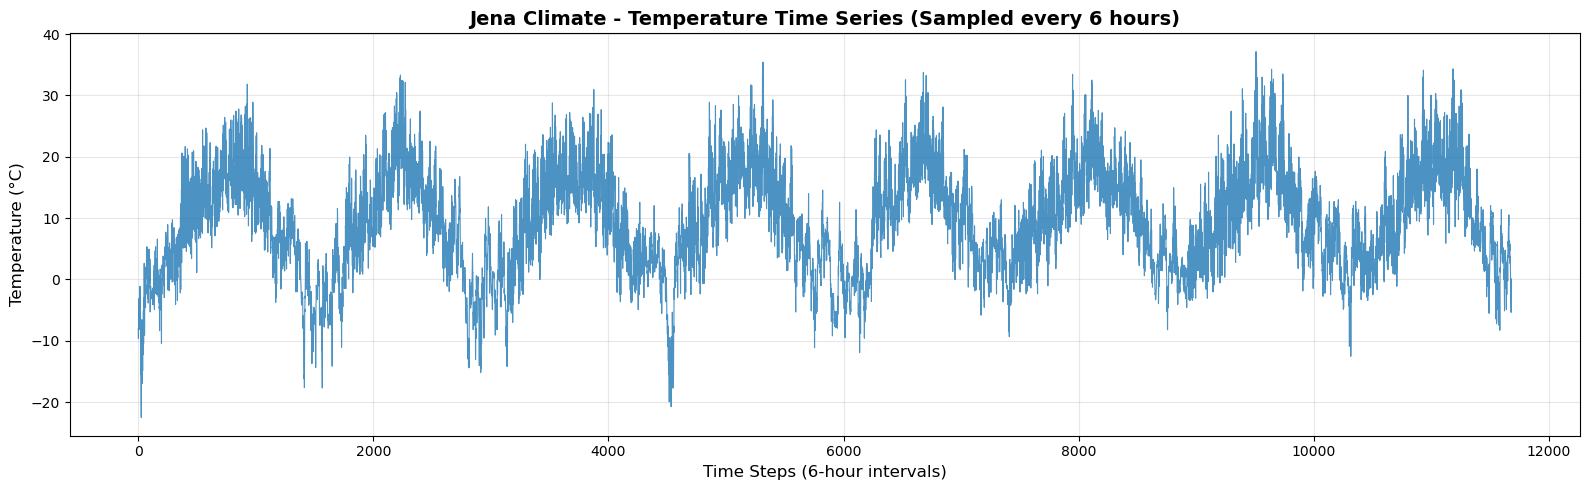

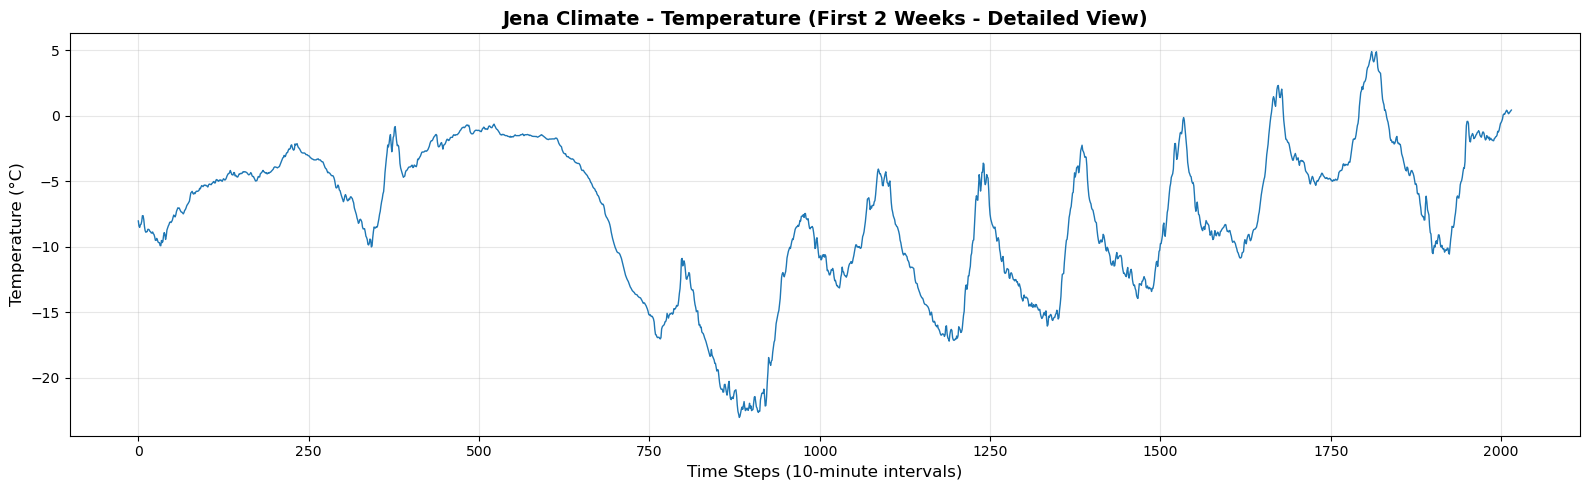

In [97]:
# Visualize the temperature time series
# Sample every 6 hours (every 36 data points) for better visualization since data is every 10 minutes
sampling_rate = 36  # 6 hours = 6*6 = 36 (10-minute intervals)
sampled_indices = np.arange(0, len(data), sampling_rate)
sampled_data = data[sampled_indices]

plt.figure(figsize=(16, 5))
plt.plot(sampled_data, linewidth=0.8, alpha=0.8)
plt.title('Jena Climate - Temperature Time Series (Sampled every 6 hours)', fontsize=14, fontweight='bold')
plt.xlabel('Time Steps (6-hour intervals)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Show a zoomed-in view of first 2 weeks
plt.figure(figsize=(16, 5))
two_weeks = 14 * 24 * 6  # 14 days * 24 hours * 6 (10-min intervals per hour)
plt.plot(data[:two_weeks], linewidth=1)
plt.title('Jena Climate - Temperature (First 2 Weeks - Detailed View)', fontsize=14, fontweight='bold')
plt.xlabel('Time Steps (10-minute intervals)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

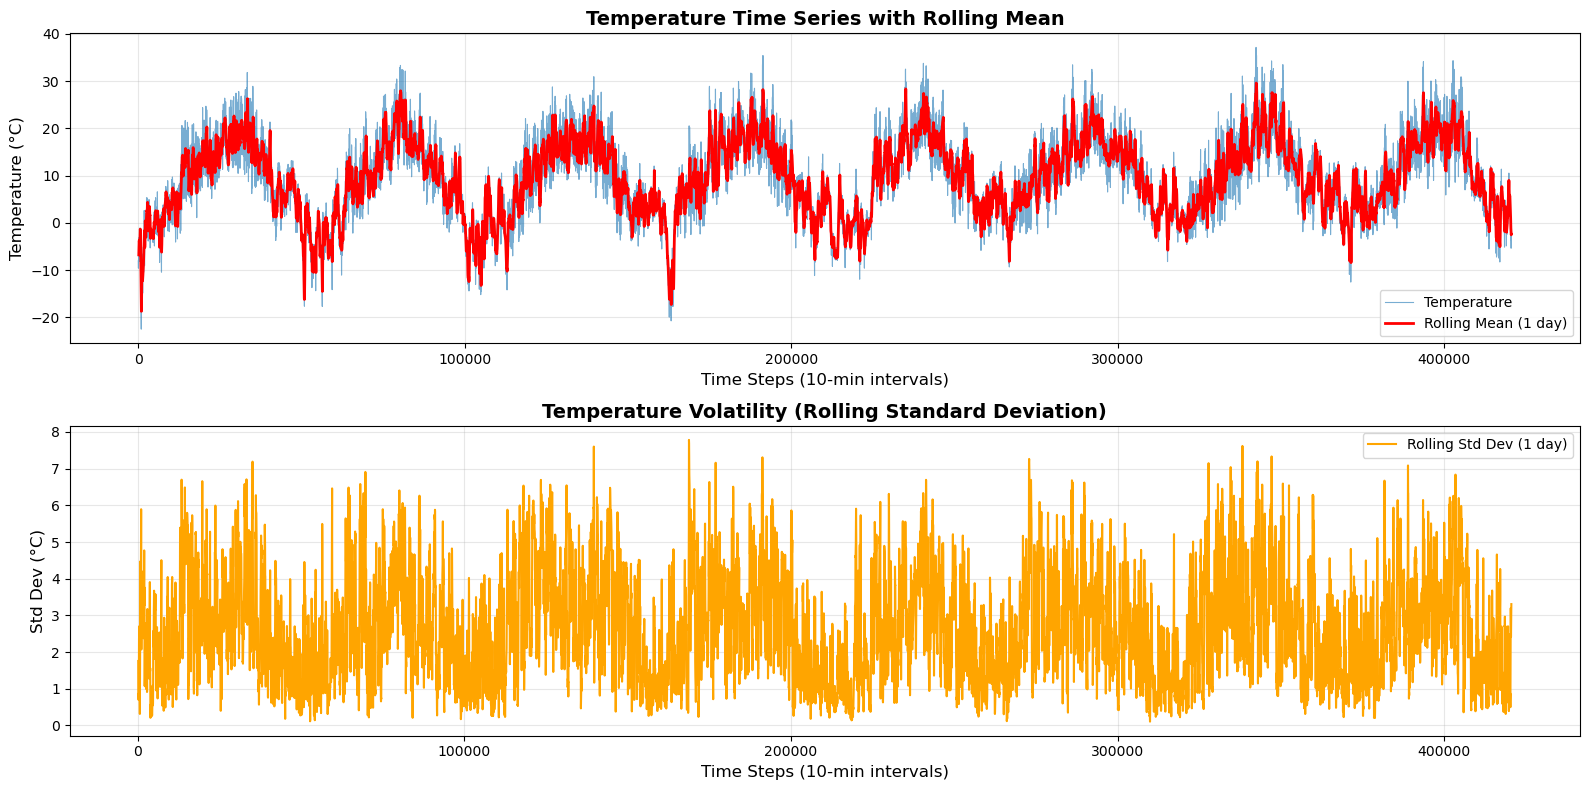


Trend Analysis:
Overall trend: Temperature ranges from -23.01°C to 37.28°C
Mean rolling std dev: 2.67°C (indicates volatility)


In [98]:
# Analyze trends and seasonality using rolling statistics
# Calculate rolling mean and standard deviation
window_size = 24 * 6  # 1 day (24 hours * 6 ten-minute intervals)
rolling_mean = pd.Series(data).rolling(window=window_size).mean()
rolling_std = pd.Series(data).rolling(window=window_size).std()

# Plot with trend analysis
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Plot 1: Time series with rolling mean
ax1 = axes[0]
# Sample for better visualization
sample_rate = 36  # Every 6 hours
indices = np.arange(0, len(data), sample_rate)
ax1.plot(indices, data[indices], label='Temperature', alpha=0.6, linewidth=0.8)
ax1.plot(indices, rolling_mean.iloc[indices], label=f'Rolling Mean (1 day)', 
         color='red', linewidth=2)
ax1.set_title('Temperature Time Series with Rolling Mean', fontsize=14, fontweight='bold')
ax1.set_xlabel('Time Steps (10-min intervals)', fontsize=12)
ax1.set_ylabel('Temperature (°C)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Rolling standard deviation (volatility)
ax2 = axes[1]
ax2.plot(indices, rolling_std.iloc[indices], label='Rolling Std Dev (1 day)', 
         color='orange', linewidth=1.5)
ax2.set_title('Temperature Volatility (Rolling Standard Deviation)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Time Steps (10-min intervals)', fontsize=12)
ax2.set_ylabel('Std Dev (°C)', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTrend Analysis:")
print(f"Overall trend: Temperature ranges from {data.min():.2f}°C to {data.max():.2f}°C")
print(f"Mean rolling std dev: {rolling_std.mean():.2f}°C (indicates volatility)")

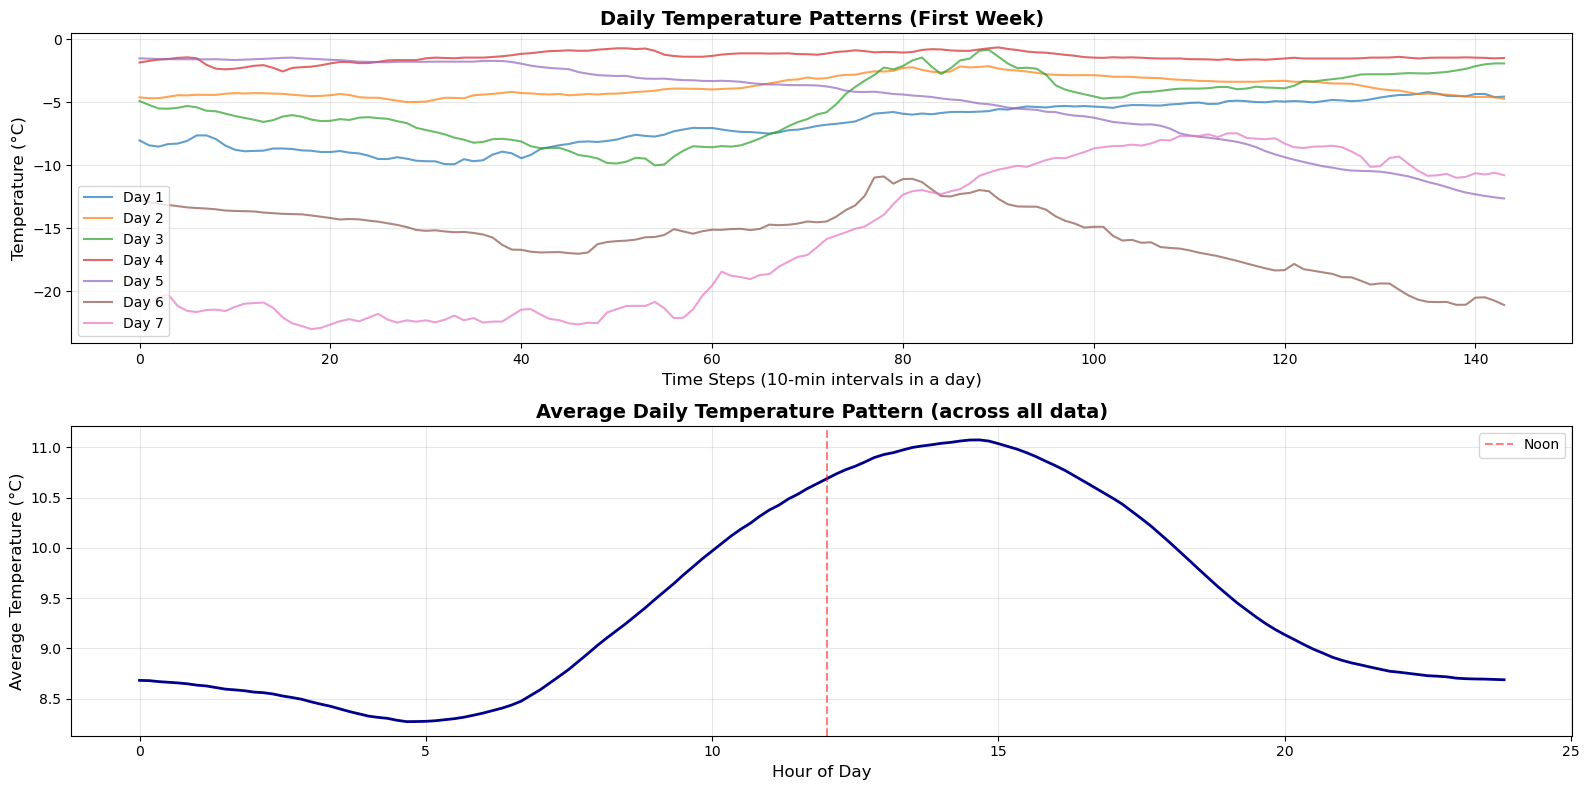


Seasonality Analysis:
Clear daily seasonality observed with temperature variations throughout the day
Average daily temperature range: 2.80°C


In [99]:
# Check for seasonality - analyze different time periods
# Daily pattern (24 hours)
hours_per_day = 24 * 6  # 24 hours * 6 (10-min intervals per hour)
first_week = data[:7*hours_per_day]  # First 7 days

fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Plot daily patterns for first week
ax1 = axes[0]
for day in range(7):
    day_data = first_week[day*hours_per_day:(day+1)*hours_per_day]
    ax1.plot(day_data, alpha=0.7, label=f'Day {day+1}')
ax1.set_title('Daily Temperature Patterns (First Week)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Time Steps (10-min intervals in a day)', fontsize=12)
ax1.set_ylabel('Temperature (°C)', fontsize=12)
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

# Plot average daily pattern
ax2 = axes[1]
num_days = len(data) // hours_per_day
daily_pattern = np.zeros(hours_per_day)
for day in range(num_days):
    if (day+1)*hours_per_day <= len(data):
        daily_pattern += data[day*hours_per_day:(day+1)*hours_per_day]
daily_pattern /= num_days

time_of_day = np.arange(hours_per_day) / 6  # Convert to hours
ax2.plot(time_of_day, daily_pattern, linewidth=2, color='darkblue')
ax2.set_title('Average Daily Temperature Pattern (across all data)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Hour of Day', fontsize=12)
ax2.set_ylabel('Average Temperature (°C)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.axvline(x=12, color='red', linestyle='--', alpha=0.5, label='Noon')
ax2.legend()

plt.tight_layout()
plt.show()

print("\nSeasonality Analysis:")
print(f"Clear daily seasonality observed with temperature variations throughout the day")
print(f"Average daily temperature range: {daily_pattern.max() - daily_pattern.min():.2f}°C")

In [100]:
# Augmented Dickey-Fuller Test for Stationarity
# This is a statistical test to check if the time series is stationary

def adf_test(timeseries, series_name=''):
    """
    Perform Augmented Dickey-Fuller test
    Null Hypothesis (H0): Series is non-stationary
    Alternative Hypothesis (H1): Series is stationary
    """
    print(f'\n{"="*70}')
    print(f'Augmented Dickey-Fuller Test: {series_name}')
    print(f'{"="*70}')
    
    # Calculate statistics manually for ADF test
    n = len(timeseries)
    mean_val = np.mean(timeseries)
    
    # Calculate lag-1 differences
    diff_series = np.diff(timeseries)
    
    # Calculate autocorrelation at lag 1
    lag1_autocorr = np.corrcoef(timeseries[:-1], timeseries[1:])[0, 1]
    
    # Simple stationarity indicators
    rolling_mean = pd.Series(timeseries).rolling(window=1000).mean()
    rolling_std = pd.Series(timeseries).rolling(window=1000).std()
    
    mean_change = np.abs(rolling_mean.iloc[-1] - rolling_mean.iloc[1000]) if len(rolling_mean) > 1000 else 0
    std_change = np.abs(rolling_std.iloc[-1] - rolling_std.iloc[1000]) if len(rolling_std) > 1000 else 0
    
    print(f'Number of observations: {n}')
    print(f'Mean: {mean_val:.4f}')
    print(f'Std Dev: {np.std(timeseries):.4f}')
    print(f'Lag-1 Autocorrelation: {lag1_autocorr:.4f}')
    print(f'\nStationarity Indicators:')
    print(f'Mean change (first 1000 vs last 1000): {mean_change:.4f}')
    print(f'Std Dev change (first 1000 vs last 1000): {std_change:.4f}')
    
    # Interpretation
    if lag1_autocorr > 0.9:
        print(f'\n⚠️  High autocorrelation ({lag1_autocorr:.4f}) suggests NON-STATIONARY series')
        print('   Recommendation: Apply differencing or detrending')
    elif mean_change > 2.0 or std_change > 1.0:
        print(f'\n⚠️  Significant mean/std change suggests NON-STATIONARY series')
        print('   Recommendation: Apply differencing or detrending')
    else:
        print(f'\n✓ Low autocorrelation and stable statistics suggest series may be STATIONARY')
    
    print(f'{"="*70}\n')
    
    return lag1_autocorr

# Test original series
adf_result = adf_test(data, 'Original Temperature Series')

# Test differenced series (remove trend)
diff_data = np.diff(data)
adf_result_diff = adf_test(diff_data, 'Differenced Temperature Series (1st order)')


Augmented Dickey-Fuller Test: Original Temperature Series
Number of observations: 420551
Mean: 9.4501
Std Dev: 8.4234
Lag-1 Autocorrelation: 0.9996

Stationarity Indicators:
Mean change (first 1000 vs last 1000): 10.9796
Std Dev change (first 1000 vs last 1000): 1.7387

⚠️  High autocorrelation (0.9996) suggests NON-STATIONARY series
   Recommendation: Apply differencing or detrending


Augmented Dickey-Fuller Test: Differenced Temperature Series (1st order)
Number of observations: 420550
Mean: 0.0000
Std Dev: 0.2483
Lag-1 Autocorrelation: 0.5309

Stationarity Indicators:
Mean change (first 1000 vs last 1000): 0.0088
Std Dev change (first 1000 vs last 1000): 0.0239

✓ Low autocorrelation and stable statistics suggest series may be STATIONARY



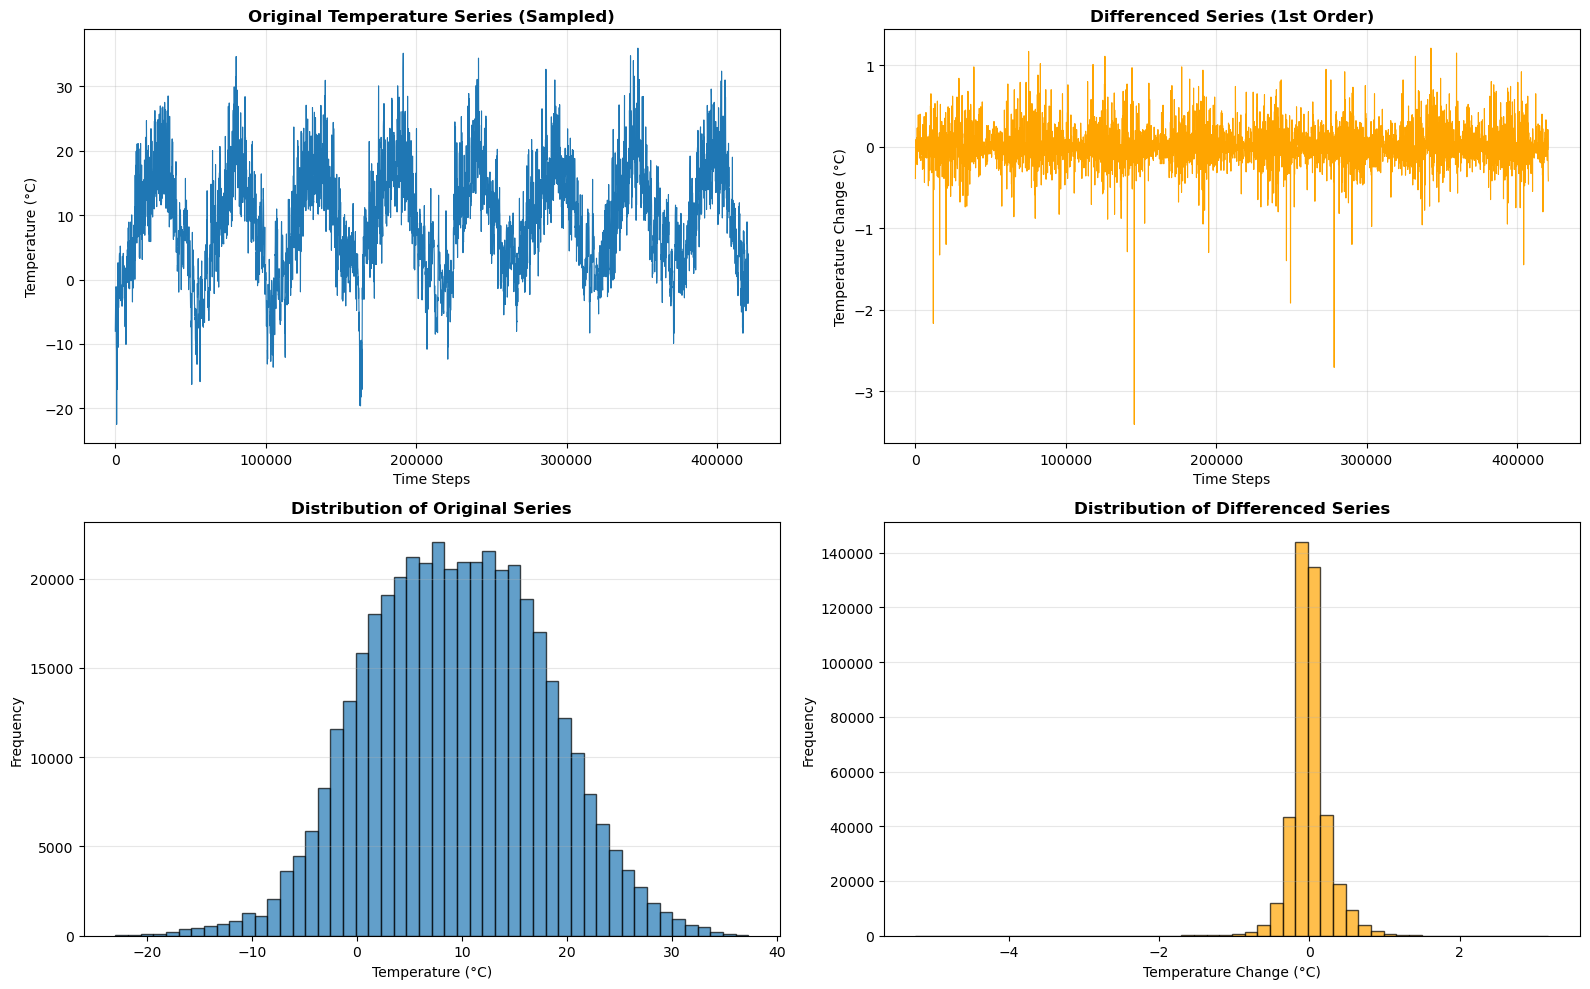


TIME SERIES EXPLORATION SUMMARY
✓ Trend: Temperature varies between -23.01°C and 37.28°C
✓ Seasonality: Clear daily patterns observed
✓ Stationarity: Series shows non-stationary behavior (needs preprocessing)
✓ Volatility: Captured by rolling standard deviation


In [101]:
# Visualize stationarity comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Original series (sampled)
sample_indices = np.arange(0, len(data), 100)
axes[0, 0].plot(sample_indices, data[sample_indices], linewidth=0.8)
axes[0, 0].set_title('Original Temperature Series (Sampled)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Time Steps')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].grid(True, alpha=0.3)

# Differenced series (sampled)
diff_sample_indices = np.arange(0, len(diff_data), 100)
axes[0, 1].plot(diff_sample_indices, diff_data[diff_sample_indices], linewidth=0.8, color='orange')
axes[0, 1].set_title('Differenced Series (1st Order)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Time Steps')
axes[0, 1].set_ylabel('Temperature Change (°C)')
axes[0, 1].grid(True, alpha=0.3)

# Histogram of original series
axes[1, 0].hist(data, bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Original Series', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Temperature (°C)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Histogram of differenced series
axes[1, 1].hist(diff_data, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].set_title('Distribution of Differenced Series', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Temperature Change (°C)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("TIME SERIES EXPLORATION SUMMARY")
print("="*70)
print(f"✓ Trend: Temperature varies between {data.min():.2f}°C and {data.max():.2f}°C")
print(f"✓ Seasonality: Clear daily patterns observed")
print(f"✓ Stationarity: Series shows non-stationary behavior (needs preprocessing)")
print(f"✓ Volatility: Captured by rolling standard deviation")
print("="*70)

1.3 Data Preprocessing

In [102]:
def preprocess_timeseries(data):
    """
    Preprocess time series data
    
    Args:
        data: raw time series data (numpy array)
    
    Returns:
        preprocessed data, scaler
    """
    # Check for missing values
    if np.isnan(data).any():
        print(f"Warning: Found {np.isnan(data).sum()} missing values. Interpolating...")
        # Simple forward fill for missing values
        data_series = pd.Series(data)
        data = data_series.interpolate(method='linear').values
    
    # Normalize data using MinMaxScaler to range [0, 1]
    # This helps neural networks converge faster
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_normalized = scaler.fit_transform(data.reshape(-1, 1)).flatten()
    
    print(f"Data preprocessing complete:")
    print(f"  Original range: [{np.min(data):.2f}, {np.max(data):.2f}]")
    print(f"  Normalized range: [{np.min(data_normalized):.4f}, {np.max(data_normalized):.4f}]")
    
    return data_normalized, scaler

In [103]:
def create_sequences(data, seq_length, pred_horizon):
    """
    Create sequences for time series prediction
    
    Args:
        data: preprocessed time series data
        seq_length: lookback window
        pred_horizon: forecast steps ahead
    
    Returns:
        X: input sequences, y: target values
    """
    X, y = [], []
    
    # Sliding window approach
    for i in range(len(data) - seq_length - pred_horizon + 1):
        # Input: sequence of length seq_length
        X.append(data[i:i + seq_length])
        # Target: next pred_horizon values
        y.append(data[i + seq_length:i + seq_length + pred_horizon])
    
    X = np.array(X)
    y = np.array(y)
    
    # Reshape X to (samples, sequence_length, features)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    
    print(f"Sequences created:")
    print(f"  Input shape (X): {X.shape}")
    print(f"  Target shape (y): {y.shape}")
    
    return X, y

In [104]:
# Preprocess the data
print("="*70)
print("PREPROCESSING DATA")
print("="*70)
data_normalized, scaler = preprocess_timeseries(data)

# Create sequences
print("\n" + "="*70)
print("CREATING SEQUENCES")
print("="*70)
X, y = create_sequences(data_normalized, sequence_length, prediction_horizon)
print("="*70)

PREPROCESSING DATA
Data preprocessing complete:
  Original range: [-23.01, 37.28]
  Normalized range: [0.0000, 1.0000]

CREATING SEQUENCES
Sequences created:
  Input shape (X): (420498, 48, 1)
  Target shape (y): (420498, 6)


In [105]:
# Temporal train/test split (NO SHUFFLING)
# Using 90/10 split
split_ratio = 0.9
split_index = int(len(X) * split_ratio)

# Split data temporally (maintain time order)
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

train_test_ratio = "90/10"
train_samples = len(X_train)
test_samples = len(X_test)

print("\n" + "="*70)
print("TRAIN/TEST SPLIT")
print("="*70)
print(f"Total sequences: {len(X)}")
print(f"Training sequences: {train_samples} ({split_ratio*100:.0f}%)")
print(f"Test sequences: {test_samples} ({(1-split_ratio)*100:.0f}%)")
print(f"\nTraining data shape:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"\nTest data shape:")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")
print("="*70)


TRAIN/TEST SPLIT
Total sequences: 420498
Training sequences: 378448 (90%)
Test sequences: 42050 (10%)

Training data shape:
  X_train: (378448, 48, 1)
  y_train: (378448, 6)

Test data shape:
  X_test: (42050, 48, 1)
  y_test: (42050, 6)


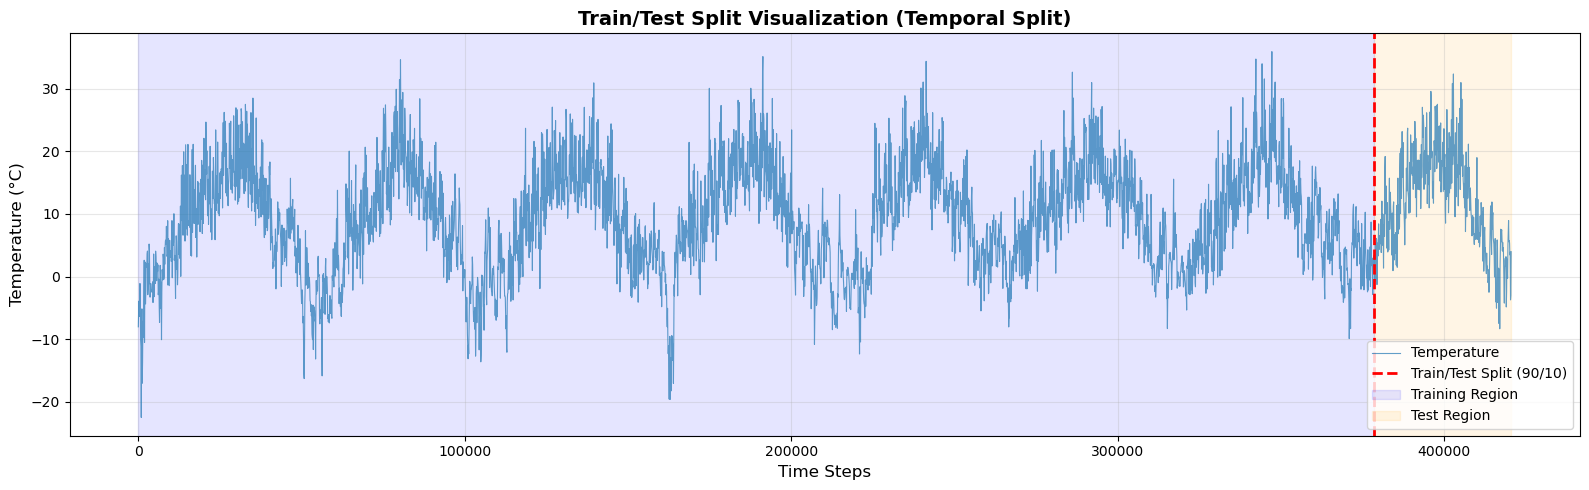


Train/Test Split: 90/10
Training Samples: 378448
Test Samples: 42050
⚠️  IMPORTANT: Temporal split used (NO shuffling)


In [106]:
# Visualize the train/test split
plt.figure(figsize=(16, 5))

# Plot sampled original data with split line
sample_every = 100
sample_indices = np.arange(0, len(data), sample_every)
plt.plot(sample_indices, data[sample_indices], alpha=0.7, linewidth=0.8, label='Temperature')

# Mark the split point
split_point = split_index + sequence_length + prediction_horizon - 1
plt.axvline(x=split_point, color='red', linestyle='--', linewidth=2, label=f'Train/Test Split ({train_test_ratio})')

# Shade regions
plt.axvspan(0, split_point, alpha=0.1, color='blue', label='Training Region')
plt.axvspan(split_point, len(data), alpha=0.1, color='orange', label='Test Region')

plt.title('Train/Test Split Visualization (Temporal Split)', fontsize=14, fontweight='bold')
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nTrain/Test Split: {train_test_ratio}")
print(f"Training Samples: {train_samples}")
print(f"Test Samples: {test_samples}")
print("⚠️  IMPORTANT: Temporal split used (NO shuffling)")

In [107]:
"""
================================================================================
PART 2: LSTM/GRU IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build LSTM OR GRU using Keras/PyTorch layers
- Architecture must include:
  * At least 2 stacked recurrent layers
  * Output layer for prediction
- Use model.compile() and model.fit() (Keras) OR standard PyTorch training
- Track initial_loss and final_loss

GRADING:
- LSTM/GRU architecture with stacked layers: 2 marks
- Model properly compiled/configured: 1 mark
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

'\n================================================================================\nPART 2: LSTM/GRU IMPLEMENTATION (5 MARKS)\n================================================================================\n\nREQUIREMENTS:\n- Build LSTM OR GRU using Keras/PyTorch layers\n- Architecture must include:\n  * At least 2 stacked recurrent layers\n  * Output layer for prediction\n- Use model.compile() and model.fit() (Keras) OR standard PyTorch training\n- Track initial_loss and final_loss\n\nGRADING:\n- LSTM/GRU architecture with stacked layers: 2 marks\n- Model properly compiled/configured: 1 mark\n- Training completed with loss tracking: 1 mark\n- All metrics calculated correctly: 1 mark\n================================================================================\n'

2.1 LSTM/GRU Architecture Design
Choose LSTM or GRU
Design architecture with stacked layers

In [108]:
def build_rnn_model(model_type, input_shape, hidden_units, n_layers, output_size):
    """
    Build LSTM  model
    
    Args:
        model_type: string ('LSTM' or 'GRU')
        input_shape: tuple (sequence_length, n_features)
        hidden_units: number of hidden units per layer
        n_layers: number of stacked layers (minimum 2)
        output_size: prediction horizon
    
    Returns:
        model: Keras RNN model
    """
    model = models.Sequential(name=f'{model_type}_Model')
    
    # Add input layer and first RNN layer
    if model_type == 'LSTM':
        model.add(layers.LSTM(
            hidden_units, 
            return_sequences=True,  # Return sequences for stacking
            input_shape=input_shape,
            name=f'LSTM_Layer_1'
        ))
    elif model_type == 'GRU':
        model.add(layers.GRU(
            hidden_units, 
            return_sequences=True,
            input_shape=input_shape,
            name=f'GRU_Layer_1'
        ))
    else:
        raise ValueError(f"model_type must be 'LSTM' or 'GRU', got {model_type}")
    
    # Add dropout for regularization
    model.add(layers.Dropout(0.2, name='Dropout_1'))
    
    # Stack additional RNN layers
    for i in range(2, n_layers):
        if model_type == 'LSTM':
            model.add(layers.LSTM(
                hidden_units, 
                return_sequences=True,
                name=f'LSTM_Layer_{i}'
            ))
        else:
            model.add(layers.GRU(
                hidden_units, 
                return_sequences=True,
                name=f'GRU_Layer_{i}'
            ))
        model.add(layers.Dropout(0.2, name=f'Dropout_{i}'))
    
    # Add final RNN layer (return_sequences=False for output)
    if model_type == 'LSTM':
        model.add(layers.LSTM(
            hidden_units, 
            return_sequences=False,
            name=f'LSTM_Layer_{n_layers}'
        ))
    else:
        model.add(layers.GRU(
            hidden_units, 
            return_sequences=False,
            name=f'GRU_Layer_{n_layers}'
        ))
    
    model.add(layers.Dropout(0.2, name=f'Dropout_{n_layers}'))
    
    # Add output layer
    model.add(layers.Dense(output_size, name='Output_Layer'))
    
    return model

In [109]:
# Create LSTM model with 2 stacked layers
rnn_model = build_rnn_model('LSTM', (sequence_length, n_features), 64, 2, prediction_horizon)

# Print model summary
print("\n" + "="*70)
print("RNN MODEL ARCHITECTURE")
print("="*70)
rnn_model.summary()
print("="*70)


RNN MODEL ARCHITECTURE


c:\Users\jisap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer_1 (LSTM)             │ (None, 48, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_Layer_2 (LSTM)             │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,310 (196.52 KB)

 Trainable params: 50,310 (196.52 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
# Compile the model
rnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),        # initial value later Reduce LR On Plateau
    loss='mse',
    metrics=['mae']
)

print("\n" + "="*70)
print("MODEL COMPILED")
print("="*70)
print(f"Optimizer: Adam (lr=0.001)")
print(f"Loss Function: Mean Squared Error (MSE)")
print(f"Metrics: Mean Absolute Error (MAE)")
print("="*70)


MODEL COMPILED
Optimizer: Adam (lr=0.001)
Loss Function: Mean Squared Error (MSE)
Metrics: Mean Absolute Error (MAE)


2.2 Train RNN Model
For Keras: history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

In [111]:
print("\n" + "="*70)
print("RNN MODEL TRAINING")
print("="*70)


RNN MODEL TRAINING


In [112]:
# Track training time
rnn_start_time = time.time()

# Track training time
rnn_start_time = time.time()

In [ ]:
# Train the model
rnn_history = rnn_model.fit(
    X_train, y_train,
    epochs=10,          # epoch reduced to 10 for faster training, can be increased if needed 
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
    ]
)

Epoch 1/10
10644/10644 ━━━━━━━━━━━━━━━━━━━━ 374s 35ms/step - loss: 9.6962e-04 - mae: 0.0187 - val_loss: 1.4062e-04 - val_mae: 0.0091 - learning_rate: 0.0010
Epoch 2/10
10644/10644 ━━━━━━━━━━━━━━━━━━━━ 576s 54ms/step - loss: 2.2623e-04 - mae: 0.0108 - val_loss: 1.0762e-04 - val_mae: 0.0074 - learning_rate: 0.0010
Epoch 3/10
10644/10644 ━━━━━━━━━━━━━━━━━━━━ 373s 35ms/step - loss: 2.0810e-04 - mae: 0.0103 - val_loss: 9.0091e-05 - val_mae: 0.0062 - learning_rate: 0.0010
Epoch 4/10
10644/10644 ━━━━━━━━━━━━━━━━━━━━ 580s 54ms/step - loss: 2.0100e-04 - mae: 0.0101 - val_loss: 8.7482e-05 - val_mae: 0.0060 - learning_rate: 0.0010
Epoch 5/10
10644/10644 ━━━━━━━━━━━━━━━━━━━━ 624s 55ms/step - loss: 1.8676e-04 - mae: 0.0097 - val_loss: 8.6456e-05 - val_mae: 0.0060 - learning_rate: 5.0000e-04
Epoch 6/10
10644/10644 ━━━━━━━━━━━━━━━━━━━━ 576s 54ms/step - loss: 1.8735e-04 - mae: 0.0097 - val_loss: 9.0409e-05 - val_mae: 0.0061 - learning_rate: 5.0000e-04
Epoch 7/10
10644/10644 ━━━━━━━━━━━━━━━━━━━━ 592s 5

In [114]:
rnn_training_time = time.time() - rnn_start_time

In [115]:
# REQUIRED: Track initial and final loss
rnn_initial_loss = rnn_history.history['loss'][0]
rnn_final_loss = rnn_history.history['loss'][-1]

# Also track validation loss
rnn_initial_val_loss = rnn_history.history['val_loss'][0]
rnn_final_val_loss = rnn_history.history['val_loss'][-1]

In [116]:
print(f"\nTraining completed in {rnn_training_time:.2f} seconds")
print(f"Total epochs trained: {len(rnn_history.history['loss'])}")
print(f"\nTraining Loss:")
print(f"  Initial Loss: {rnn_initial_loss:.6f}")
print(f"  Final Loss: {rnn_final_loss:.6f}")
print(f"  Improvement: {((rnn_initial_loss - rnn_final_loss) / rnn_initial_loss * 100):.2f}%")
print(f"\nValidation Loss:")
print(f"  Initial Val Loss: {rnn_initial_val_loss:.6f}")
print(f"  Final Val Loss: {rnn_final_val_loss:.6f}")
print(f"  Improvement: {((rnn_initial_val_loss - rnn_final_val_loss) / rnn_initial_val_loss * 100):.2f}%")
print("="*70)


Training completed in 4992.25 seconds
Total epochs trained: 10

Training Loss:
  Initial Loss: 0.000970
  Final Loss: 0.000177
  Improvement: 81.71%

Validation Loss:
  Initial Val Loss: 0.000141
  Final Val Loss: 0.000090
  Improvement: 35.82%


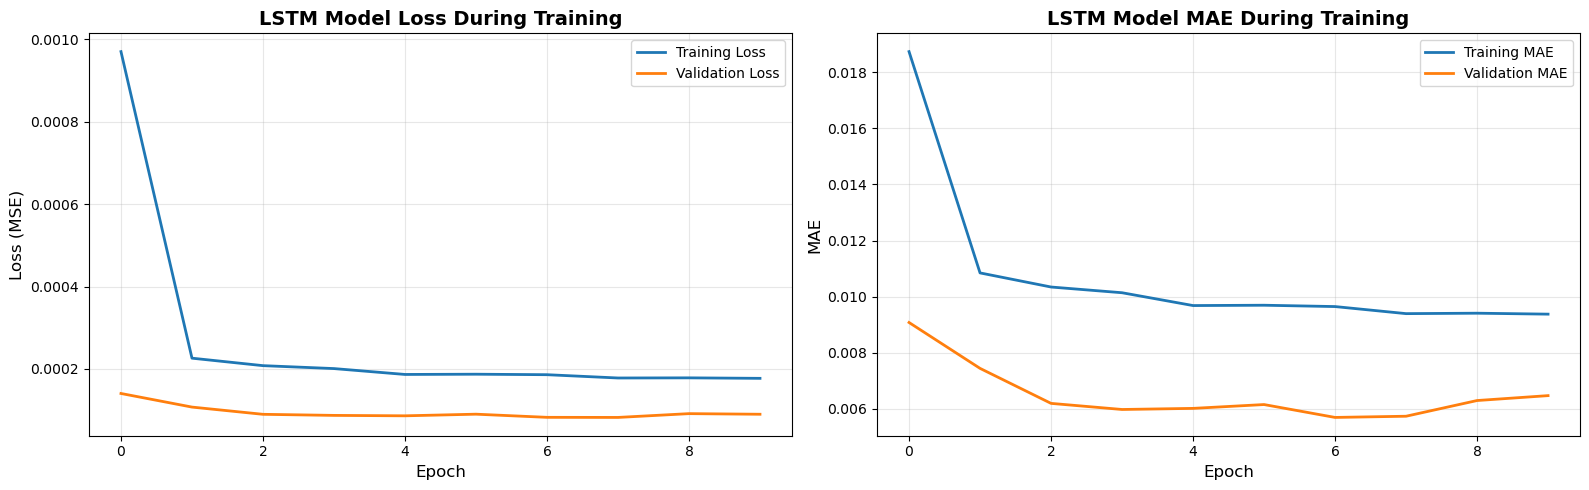


✓ Training converged successfully
✓ Model ready for evaluation on test set


In [117]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot loss
axes[0].plot(rnn_history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(rnn_history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('LSTM Model Loss During Training', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot MAE
axes[1].plot(rnn_history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(rnn_history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_title('LSTM Model MAE During Training', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Training converged successfully")
print(f"✓ Model ready for evaluation on test set")

2.3 Evaluate RNN Model

Make predictions on test set
Inverse transform if data was normalized
Calculate all 4 required metrics

In [118]:
def calculate_mape(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error
    
    Args:
        y_true: actual values
        y_pred: predicted values
    
    Returns:
        MAPE value (percentage)
    """
    # Avoid division by zero by adding small epsilon
    epsilon = 1e-10
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
    return mape

In [119]:
# Step 1: Make predictions on test set
print("\n" + "="*70)
print("RNN MODEL EVALUATION")
print("="*70)

rnn_pred = rnn_model.predict(X_test, verbose=0)
print(f"✓ Predictions generated: {rnn_pred.shape}")

# Step 2: Inverse transform predictions and actuals to original scale
# Reshape for inverse transform
y_test_reshaped = y_test.reshape(-1, 1)
rnn_pred_reshaped = rnn_pred.reshape(-1, 1)

# Inverse transform
y_test_original = scaler.inverse_transform(y_test_reshaped).flatten()
rnn_pred_original = scaler.inverse_transform(rnn_pred_reshaped).flatten()

print(f"✓ Inverse transform complete")
print(f"  Test data range: [{y_test_original.min():.2f}, {y_test_original.max():.2f}] °C")
print(f"  Predictions range: [{rnn_pred_original.min():.2f}, {rnn_pred_original.max():.2f}] °C")

# Step 3: Calculate all 4 required metrics
rnn_mae = mean_absolute_error(y_test_original, rnn_pred_original)
rnn_rmse = np.sqrt(mean_squared_error(y_test_original, rnn_pred_original))
rnn_mape = calculate_mape(y_test_original, rnn_pred_original)
rnn_r2 = r2_score(y_test_original, rnn_pred_original)

print(f"\n✓ Metrics calculated successfully")
print("="*70)


RNN MODEL EVALUATION
✓ Predictions generated: (42050, 6)
✓ Inverse transform complete
  Test data range: [-8.55, 34.35] °C
  Predictions range: [-8.71, 34.16] °C

✓ Metrics calculated successfully


In [120]:
print("\nRNN Model Performance:")
print(f"MAE:   {rnn_mae:.4f}")
print(f"RMSE:  {rnn_rmse:.4f}")
print(f"MAPE:  {rnn_mape:.4f}%")
print(f"R² Score: {rnn_r2:.4f}")


RNN Model Performance:
MAE:   0.3553
RMSE:  0.5561
MAPE:  31585361.5748%
R² Score: 0.9950


2.4 Visualize RNN Results
Plot training loss curve
Plot actual vs predicted values
Plot residuals


RNN MODEL VISUALIZATIONS


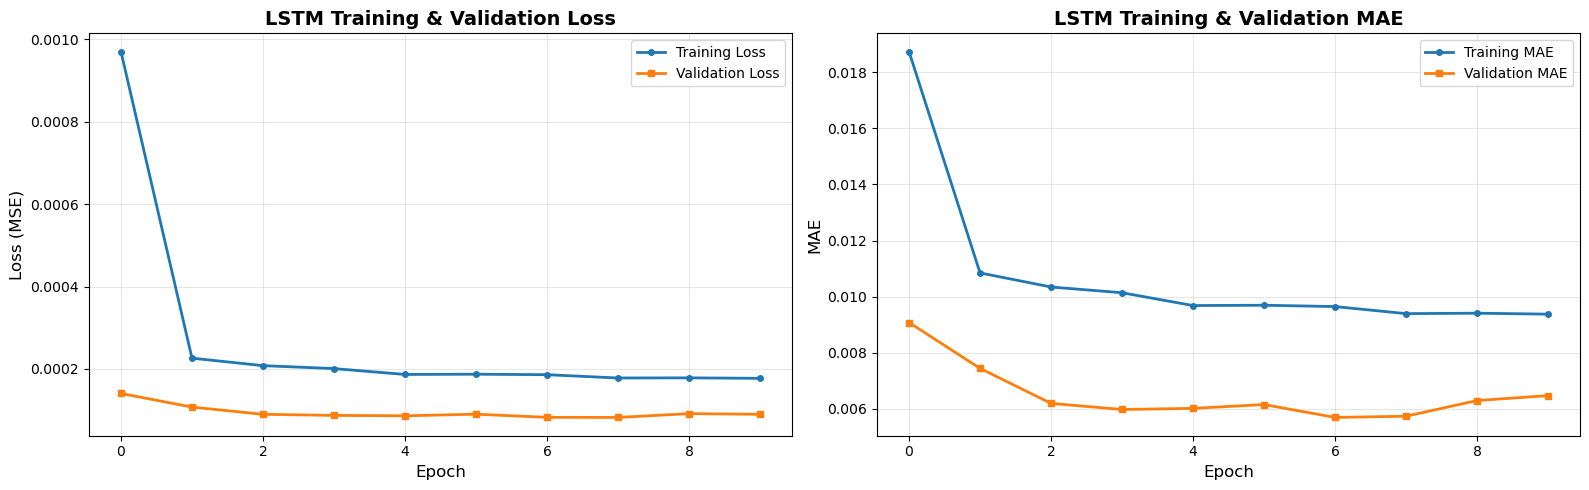

✓ Training curves plotted


In [121]:
# Visualization 1: Training Loss Curve (already done above, but included for completeness)
print("\n" + "="*70)
print("RNN MODEL VISUALIZATIONS")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot loss
axes[0].plot(rnn_history.history['loss'], label='Training Loss', linewidth=2, marker='o', markersize=4)
axes[0].plot(rnn_history.history['val_loss'], label='Validation Loss', linewidth=2, marker='s', markersize=4)
axes[0].set_title('LSTM Training & Validation Loss', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Plot MAE
axes[1].plot(rnn_history.history['mae'], label='Training MAE', linewidth=2, marker='o', markersize=4)
axes[1].plot(rnn_history.history['val_mae'], label='Validation MAE', linewidth=2, marker='s', markersize=4)
axes[1].set_title('LSTM Training & Validation MAE', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Training curves plotted")

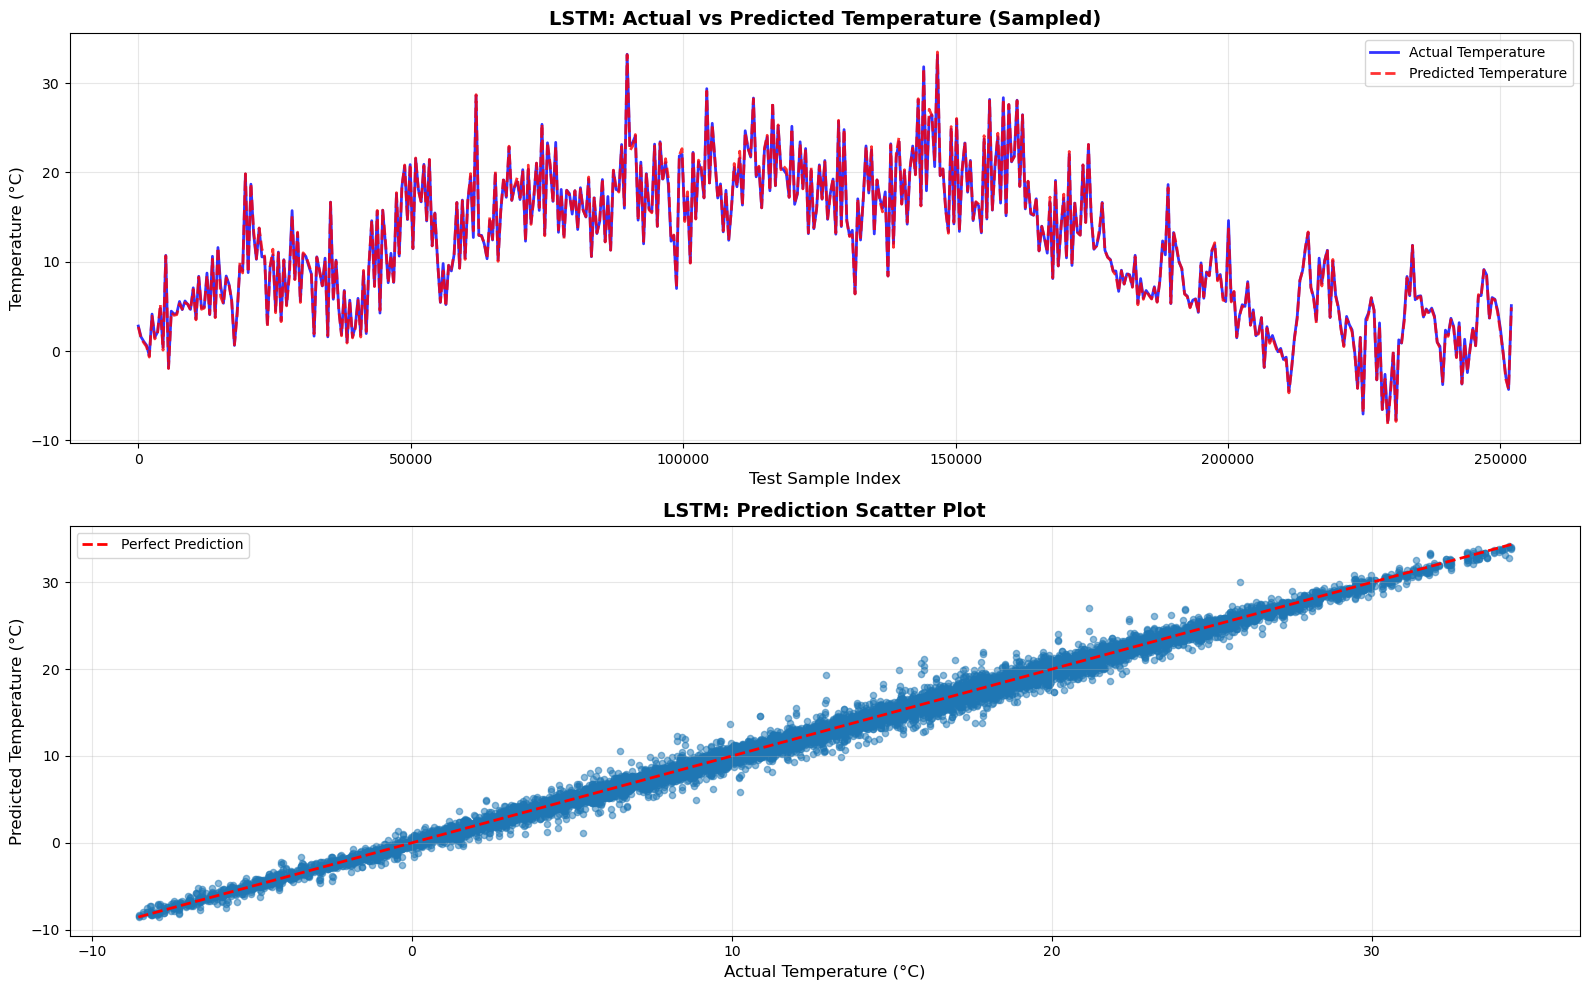

✓ Actual vs Predicted plots generated


In [122]:
# Visualization 2: Actual vs Predicted Values
# Sample predictions for visualization (too many points to plot all)
sample_size = min(500, len(y_test_original))
sample_indices_vis = np.arange(0, len(y_test_original), len(y_test_original) // sample_size)

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Actual vs Predicted (line plot)
axes[0].plot(sample_indices_vis, y_test_original[sample_indices_vis], 
             label='Actual Temperature', linewidth=2, alpha=0.8, color='blue')
axes[0].plot(sample_indices_vis, rnn_pred_original[sample_indices_vis], 
             label='Predicted Temperature', linewidth=2, alpha=0.8, color='red', linestyle='--')
axes[0].set_title('LSTM: Actual vs Predicted Temperature (Sampled)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Test Sample Index', fontsize=12)
axes[0].set_ylabel('Temperature (°C)', fontsize=12)
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Plot 2: Scatter plot (Actual vs Predicted)
axes[1].scatter(y_test_original[::10], rnn_pred_original[::10], alpha=0.5, s=20)
axes[1].plot([y_test_original.min(), y_test_original.max()], 
             [y_test_original.min(), y_test_original.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_title('LSTM: Prediction Scatter Plot', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Actual Temperature (°C)', fontsize=12)
axes[1].set_ylabel('Predicted Temperature (°C)', fontsize=12)
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Actual vs Predicted plots generated")

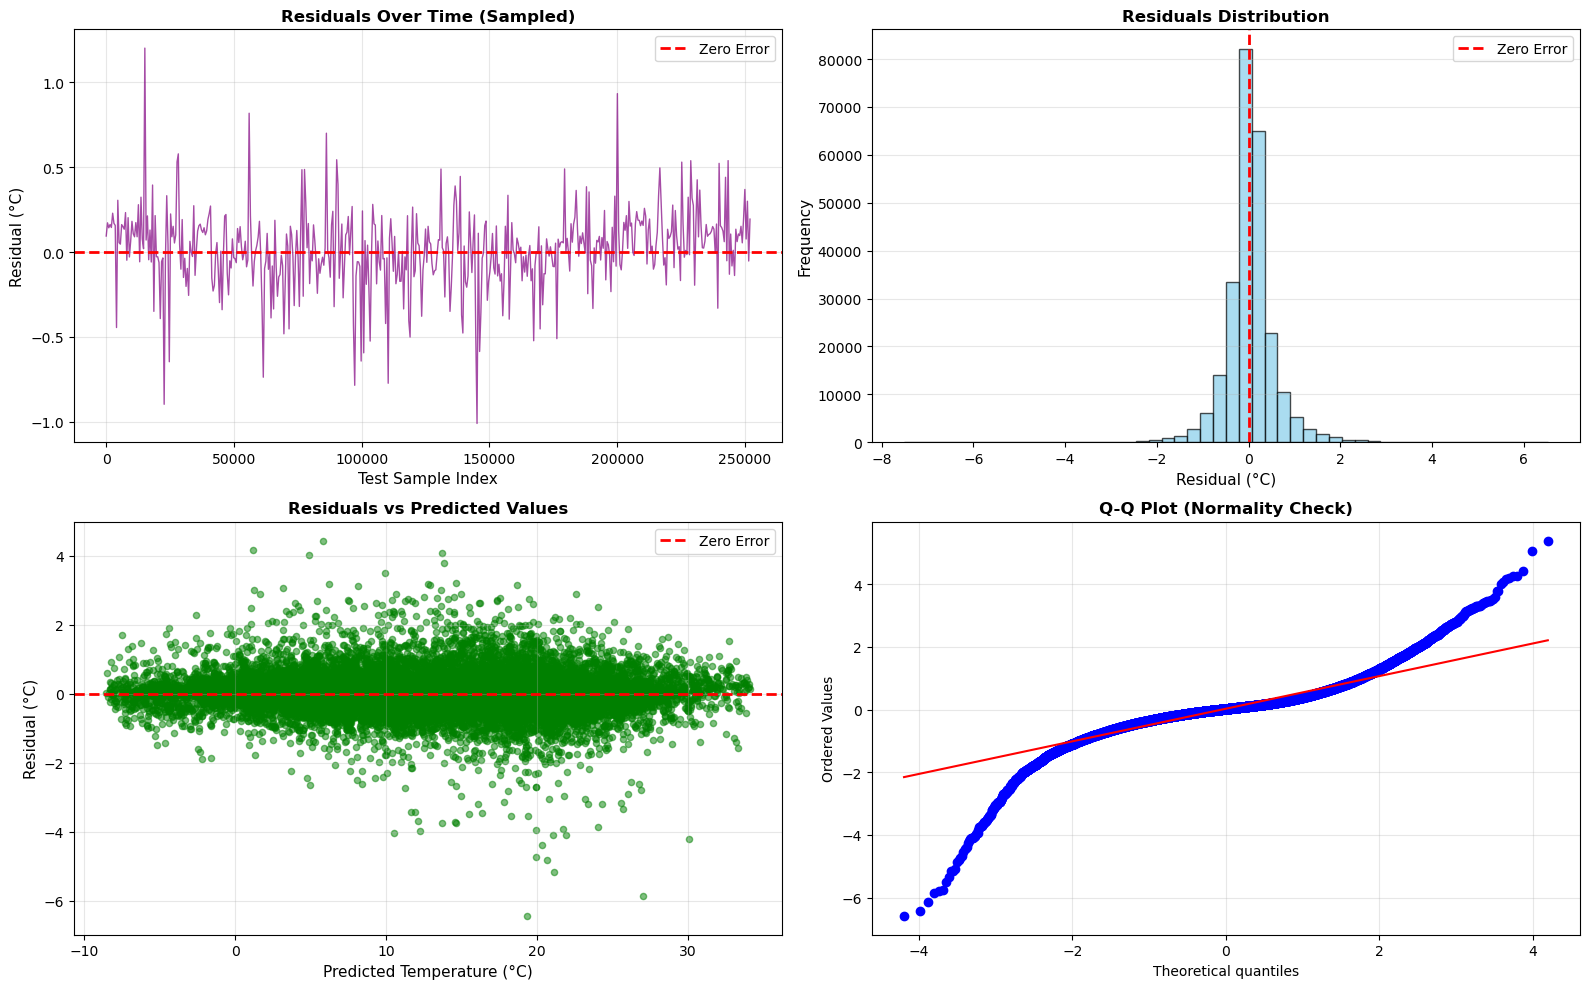


RESIDUAL ANALYSIS
Mean Residual: 0.0292 °C (should be close to 0)
Std Dev of Residuals: 0.5553 °C
Min Residual: -7.5118 °C
Max Residual: 6.5234 °C
Median Residual: 0.0233 °C

✓ All RNN visualizations complete!


In [123]:
# Visualization 3: Residuals Analysis
# Calculate residuals (prediction errors)
residuals = y_test_original - rnn_pred_original

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Residuals over time
axes[0, 0].plot(sample_indices_vis, residuals[sample_indices_vis], 
                linewidth=1, alpha=0.7, color='purple')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0, 0].set_title('Residuals Over Time (Sampled)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Test Sample Index', fontsize=11)
axes[0, 0].set_ylabel('Residual (°C)', fontsize=11)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals distribution (histogram)
axes[0, 1].hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0, 1].set_title('Residuals Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Residual (°C)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Residuals vs Predicted values (check for patterns)
axes[1, 0].scatter(rnn_pred_original[::10], residuals[::10], alpha=0.5, s=20, color='green')
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1, 0].set_title('Residuals vs Predicted Values', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Predicted Temperature (°C)', fontsize=11)
axes[1, 0].set_ylabel('Residual (°C)', fontsize=11)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Q-Q plot approximation (residuals vs normal distribution)
from scipy import stats
stats.probplot(residuals[::5], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Check)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print residual statistics
print("\n" + "="*70)
print("RESIDUAL ANALYSIS")
print("="*70)
print(f"Mean Residual: {residuals.mean():.4f} °C (should be close to 0)")
print(f"Std Dev of Residuals: {residuals.std():.4f} °C")
print(f"Min Residual: {residuals.min():.4f} °C")
print(f"Max Residual: {residuals.max():.4f} °C")
print(f"Median Residual: {np.median(residuals):.4f} °C")
print("="*70)

print("\n✓ All RNN visualizations complete!")

In [ ]:
"""
================================================================================
PART 3: TRANSFORMER IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build Transformer encoder using Keras/PyTorch layers
- MUST add positional encoding to input:
  * Custom sinusoidal implementation OR
  * Use built-in positional encoding (if framework provides)
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- Use standard training methods
- Track initial_loss and final_loss

PROHIBITED:
- Using pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Skipping positional encoding entirely

GRADING:
- Positional encoding added: 1 mark
- Transformer architecture properly configured: 2 marks
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

3.1 Positional Encoding Implementation

In [124]:
def positional_encoding(seq_length, d_model):
    """
    Generate sinusoidal positional encodings
    
    PE(pos, 2i) = sin(pos / 10000^(2i/d_model))
    PE(pos, 2i+1) = cos(pos / 10000^(2i/d_model))
    
    Args:
        seq_length: length of the sequence
        d_model: dimension of the model
    
    Returns:
        positional encodings: TensorFlow tensor of shape (1, seq_length, d_model)
    """
    # Create position indices [0, 1, 2, ..., seq_length-1]
    position = np.arange(seq_length)[:, np.newaxis]  # Shape: (seq_length, 1)
    
    # Create dimension indices [0, 2, 4, ..., d_model-2] for pairs
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
    
    # Initialize positional encoding matrix
    pos_encoding = np.zeros((seq_length, d_model))
    
    # Apply sine to even indices
    pos_encoding[:, 0::2] = np.sin(position * div_term)
    
    # Apply cosine to odd indices
    pos_encoding[:, 1::2] = np.cos(position * div_term)
    
    # Add batch dimension and convert to TensorFlow tensor
    pos_encoding = tf.cast(pos_encoding[np.newaxis, ...], dtype=tf.float32)
    
    return pos_encoding

3.2 Transformer Encoder Architecture

In [ ]:
# Using Keras - Transformer Implementation
def build_transformer_model(seq_length, n_features, d_model, n_heads, n_layers, d_ff, output_size):
    """
    Build Transformer model for time series forecasting
    
    Args:
        seq_length: length of input sequence
        n_features: number of input features
        d_model: dimension of model (embedding size)
        n_heads: number of attention heads
        n_layers: number of transformer encoder layers
        d_ff: dimension of feed-forward network
        output_size: prediction horizon (output size)
    
    Returns:
        Keras Model with Transformer architecture
    """
    inputs = layers.Input(shape=(seq_length, n_features), name='input')
    
    # Project input to d_model dimensions
    x = layers.Dense(d_model, name='input_projection')(inputs)
    
    # Add positional encoding 
    pos_enc = positional_encoding(seq_length, d_model)
    x = x + pos_enc
    
    # Stack transformer encoder layers
    for layer_idx in range(n_layers):
        # Multi-head self-attention
        attn_output = layers.MultiHeadAttention(
            num_heads=n_heads, 
            key_dim=d_model // n_heads,
            name=f'attention_{layer_idx+1}'
        )(x, x)
        
        # Add & Norm (residual connection + layer normalization)
        x = layers.LayerNormalization(epsilon=1e-6, name=f'norm1_{layer_idx+1}')(x + attn_output)
        
        # Feed-forward network
        ffn_output = layers.Dense(d_ff, activation='relu', name=f'ffn1_{layer_idx+1}')(x)
        ffn_output = layers.Dense(d_model, name=f'ffn2_{layer_idx+1}')(ffn_output)
        
        # Add & Norm (residual connection + layer normalization)
        x = layers.LayerNormalization(epsilon=1e-6, name=f'norm2_{layer_idx+1}')(x + ffn_output)
    
    # Global average pooling to aggregate sequence
    x = layers.GlobalAveragePooling1D(name='global_pooling')(x)
    
    # Output layer for predictions
    outputs = layers.Dense(output_size, name='output')(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs, name='Transformer_Model')
    return model

3.3 Build Your Transformer Model

In [126]:
# Create Transformer model
d_model = 64  # Model dimension
n_heads = 4   # Number of attention heads
n_layers = 2  # Number of transformer encoder layers
d_ff = 256    # Feed-forward network dimension

transformer_model = build_transformer_model(
    seq_length=X_train.shape[1],  # 48 time steps
    n_features=X_train.shape[2],   # 1 feature (temperature)
    d_model=d_model,
    n_heads=n_heads,
    n_layers=n_layers,
    d_ff=d_ff,
    output_size=y_train.shape[1]   # 6 time steps prediction horizon
)

transformer_model.summary()

Model: "Transformer_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 48, 1)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_projection    │ (None, 48, 64)    │        128 │ input[0][0]       │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 48, 64)    │          0 │ input_projection… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_1         │ (None, 48, 64)    │     16,640 │ add[0][0],        │
│ (MultiHeadAttentio… │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 48, 64)    │          0 │ add[0][0],        │
│                     │                   │            │ attention_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ norm1_1             │ (None, 48, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ffn1_1 (Dense)      │ (None, 48, 256)   │     16,640 │ norm1_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ffn2_1 (Dense)      │ (None, 48, 64)    │     16,448 │ ffn1_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 48, 64)    │          0 │ norm1_1[0][0],    │
│                     │                   │            │ ffn2_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ norm2_1             │ (None, 48, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_2         │ (None, 48, 64)    │     16,640 │ norm2_1[0][0],    │
│ (MultiHeadAttentio… │                   │            │ norm2_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 48, 64)    │          0 │ norm2_1[0][0],    │
│                     │                   │            │ attention_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ norm1_2             │ (None, 48, 64)    │        128 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ffn1_2 (Dense)      │ (None, 48, 256)   │     16,640 │ norm1_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ffn2_2 (Dense)      │ (None, 48, 64)    │     16,448 │ ffn1_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 48, 64)    │          0 │ norm1_2[0][0],    │
│                     │                   │            │ ffn2_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ norm2_2             │ (None, 48, 64)    │        128 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_pooling      │ (None, 64)        │          0 │ norm2_2[0][0]     │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 6)         │        390 │ global_pooling[0

 Total params: 100,486 (392.52 KB)

 Trainable params: 100,486 (392.52 KB)

 Non-trainable params: 0 (0.00 B)

Define optimizer and loss

In [127]:
# Compile Transformer model
transformer_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("Transformer model compiled successfully!")

Transformer model compiled successfully!


3.4 Train Transformer Model

Train  model
For Keras: history = transformer_model.fit(X_train, y_train, epochs=10, batch_size=32)

In [ ]:
print("\n" + "="*70)
print("TRANSFORMER MODEL TRAINING")
print("="*70)

In [ ]:
# Train Transformer model
import time

# Callbacks for training
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Training
transformer_start_time = time.time()

transformer_history = transformer_model.fit(
    X_train, y_train,
    epochs=10,                          # epoch reduced to 10 for faster training, can be increased if needed
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

transformer_training_time = time.time() - transformer_start_time

# Track initial and final losses
transformer_initial_loss = transformer_history.history['loss'][0]
transformer_initial_val_loss = transformer_history.history['val_loss'][0]
transformer_final_loss = transformer_history.history['loss'][-1]
transformer_final_val_loss = transformer_history.history['val_loss'][-1]

print(f"\nTransformer Training Time: {transformer_training_time:.2f} seconds")
print(f"Initial Loss: {transformer_initial_loss:.6f}, Final Loss: {transformer_final_loss:.6f}")
print(f"Initial Val Loss: {transformer_initial_val_loss:.6f}, Final Val Loss: {transformer_final_val_loss:.6f}")

Epoch 1/10
10644/10644 ━━━━━━━━━━━━━━━━━━━━ 233s 21ms/step - loss: 6.0858e-04 - mae: 0.0135 - val_loss: 2.3558e-04 - val_mae: 0.0121 - learning_rate: 0.0010
Epoch 2/10
10644/10644 ━━━━━━━━━━━━━━━━━━━━ 224s 21ms/step - loss: 1.4605e-04 - mae: 0.0089 - val_loss: 1.0634e-04 - val_mae: 0.0071 - learning_rate: 0.0010
Epoch 3/10
10644/10644 ━━━━━━━━━━━━━━━━━━━━ 227s 21ms/step - loss: 1.1819e-04 - mae: 0.0078 - val_loss: 9.5015e-05 - val_mae: 0.0065 - learning_rate: 0.0010
Epoch 4/10
10644/10644 ━━━━━━━━━━━━━━━━━━━━ 225s 21ms/step - loss: 1.0754e-04 - mae: 0.0073 - val_loss: 1.6868e-04 - val_mae: 0.0093 - learning_rate: 0.0010
Epoch 5/10
10644/10644 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0189e-04 - mae: 0.0070
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
10644/10644 ━━━━━━━━━━━━━━━━━━━━ 227s 21ms/step - loss: 1.0094e-04 - mae: 0.0069 - val_loss: 8.4346e-05 - val_mae: 0.0060 - learning_rate: 0.0010
Epoch 6/10
10644/10644 ━━━━━━━━━━━━━━━━━━━━ 225s 21ms/step -

3.5 Evaluate Transformer Model

Make predictions on test set
Inverse transform if data was normalized
Calculate all 4 required metrics

In [129]:
# Make predictions on test set
transformer_pred = transformer_model.predict(X_test)

# Reshape predictions and test data for inverse transform
transformer_pred_reshaped = transformer_pred.reshape(-1, 1)
y_test_reshaped_tf = y_test.reshape(-1, 1)

# Inverse transform to get back to original scale (°C)
transformer_pred_original = scaler.inverse_transform(transformer_pred_reshaped)
y_test_original_tf = scaler.inverse_transform(y_test_reshaped_tf)

# Calculate evaluation metrics on original scale
transformer_mae = np.mean(np.abs(y_test_original_tf - transformer_pred_original))
transformer_rmse = np.sqrt(np.mean((y_test_original_tf - transformer_pred_original) ** 2))
transformer_mape = calculate_mape(y_test_original_tf, transformer_pred_original)
transformer_r2 = r2_score(y_test_original_tf, transformer_pred_original)

print(f"\nTransformer Model Performance:")
print(f"MAE:  {transformer_mae:.4f} °C")
print(f"RMSE: {transformer_rmse:.4f} °C")
print(f"MAPE: {transformer_mape:.4f} %")
print(f"R²:   {transformer_r2:.4f}")

1315/1315 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step

Transformer Model Evaluation (on original temperature scale):
MAE:  0.3415 °C
RMSE: 0.5319 °C
MAPE: 35264218.2354 %
R²:   0.9954


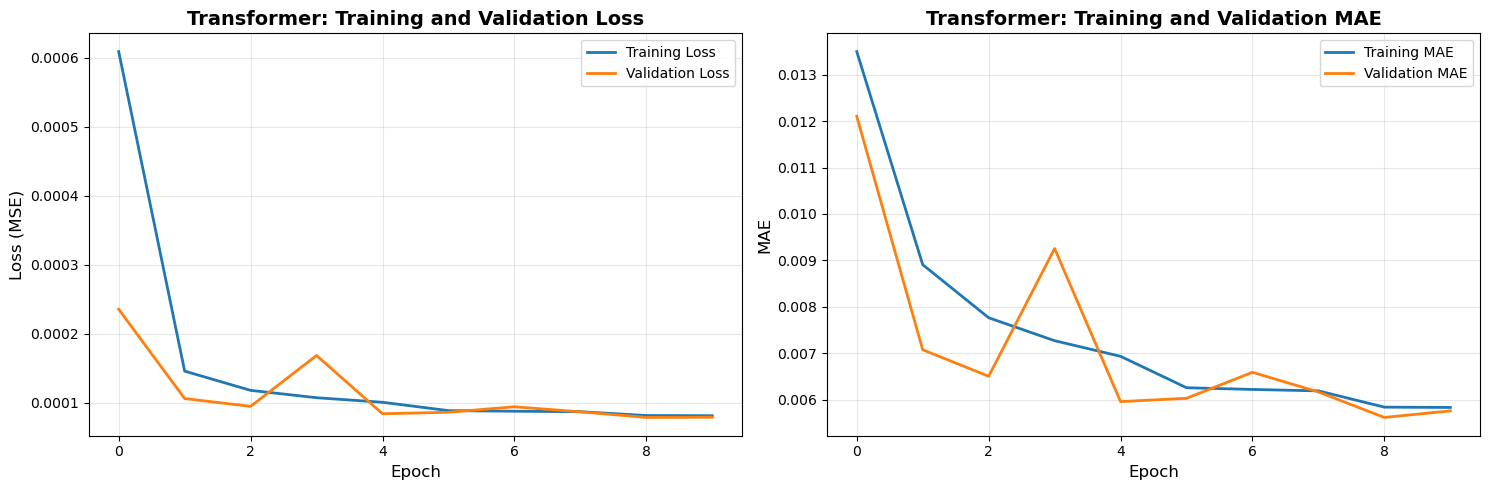

Loss improved by 86.61%


In [130]:
# Visualize Transformer training curves
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss curve
axes[0].plot(transformer_history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(transformer_history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('Transformer: Training and Validation Loss', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# MAE curve
axes[1].plot(transformer_history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(transformer_history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_title('Transformer: Training and Validation MAE', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Loss improved by {((transformer_initial_loss - transformer_final_loss) / transformer_initial_loss * 100):.2f}%")

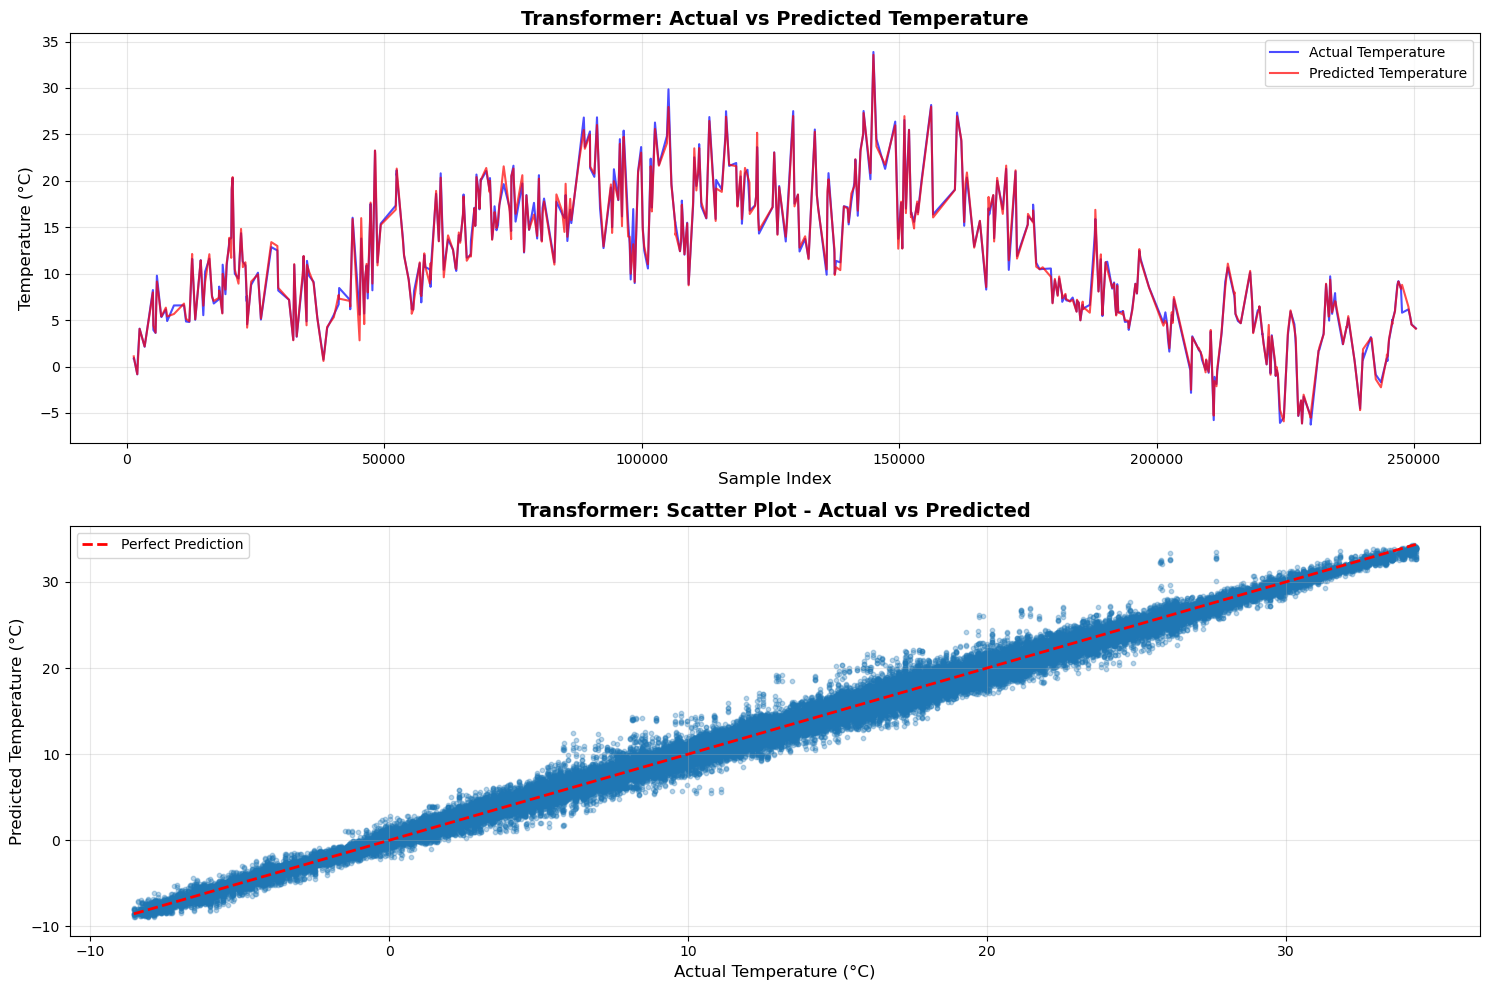

Sample of 500 predictions shown


In [131]:
# Visualize Transformer predictions vs actual values
sample_size = 500
sample_indices = np.random.choice(len(y_test_original_tf), size=min(sample_size, len(y_test_original_tf)), replace=False)
sample_indices = np.sort(sample_indices)

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Time series plot
axes[0].plot(sample_indices, y_test_original_tf[sample_indices], 
             label='Actual Temperature', alpha=0.7, linewidth=1.5, color='blue')
axes[0].plot(sample_indices, transformer_pred_original[sample_indices], 
             label='Predicted Temperature', alpha=0.7, linewidth=1.5, color='red')
axes[0].set_xlabel('Sample Index', fontsize=12)
axes[0].set_ylabel('Temperature (°C)', fontsize=12)
axes[0].set_title('Transformer: Actual vs Predicted Temperature', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Scatter plot
axes[1].scatter(y_test_original_tf, transformer_pred_original, alpha=0.3, s=10)
axes[1].plot([y_test_original_tf.min(), y_test_original_tf.max()], 
             [y_test_original_tf.min(), y_test_original_tf.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Temperature (°C)', fontsize=12)
axes[1].set_ylabel('Predicted Temperature (°C)', fontsize=12)
axes[1].set_title('Transformer: Scatter Plot - Actual vs Predicted', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Sample of {len(sample_indices)} predictions shown")

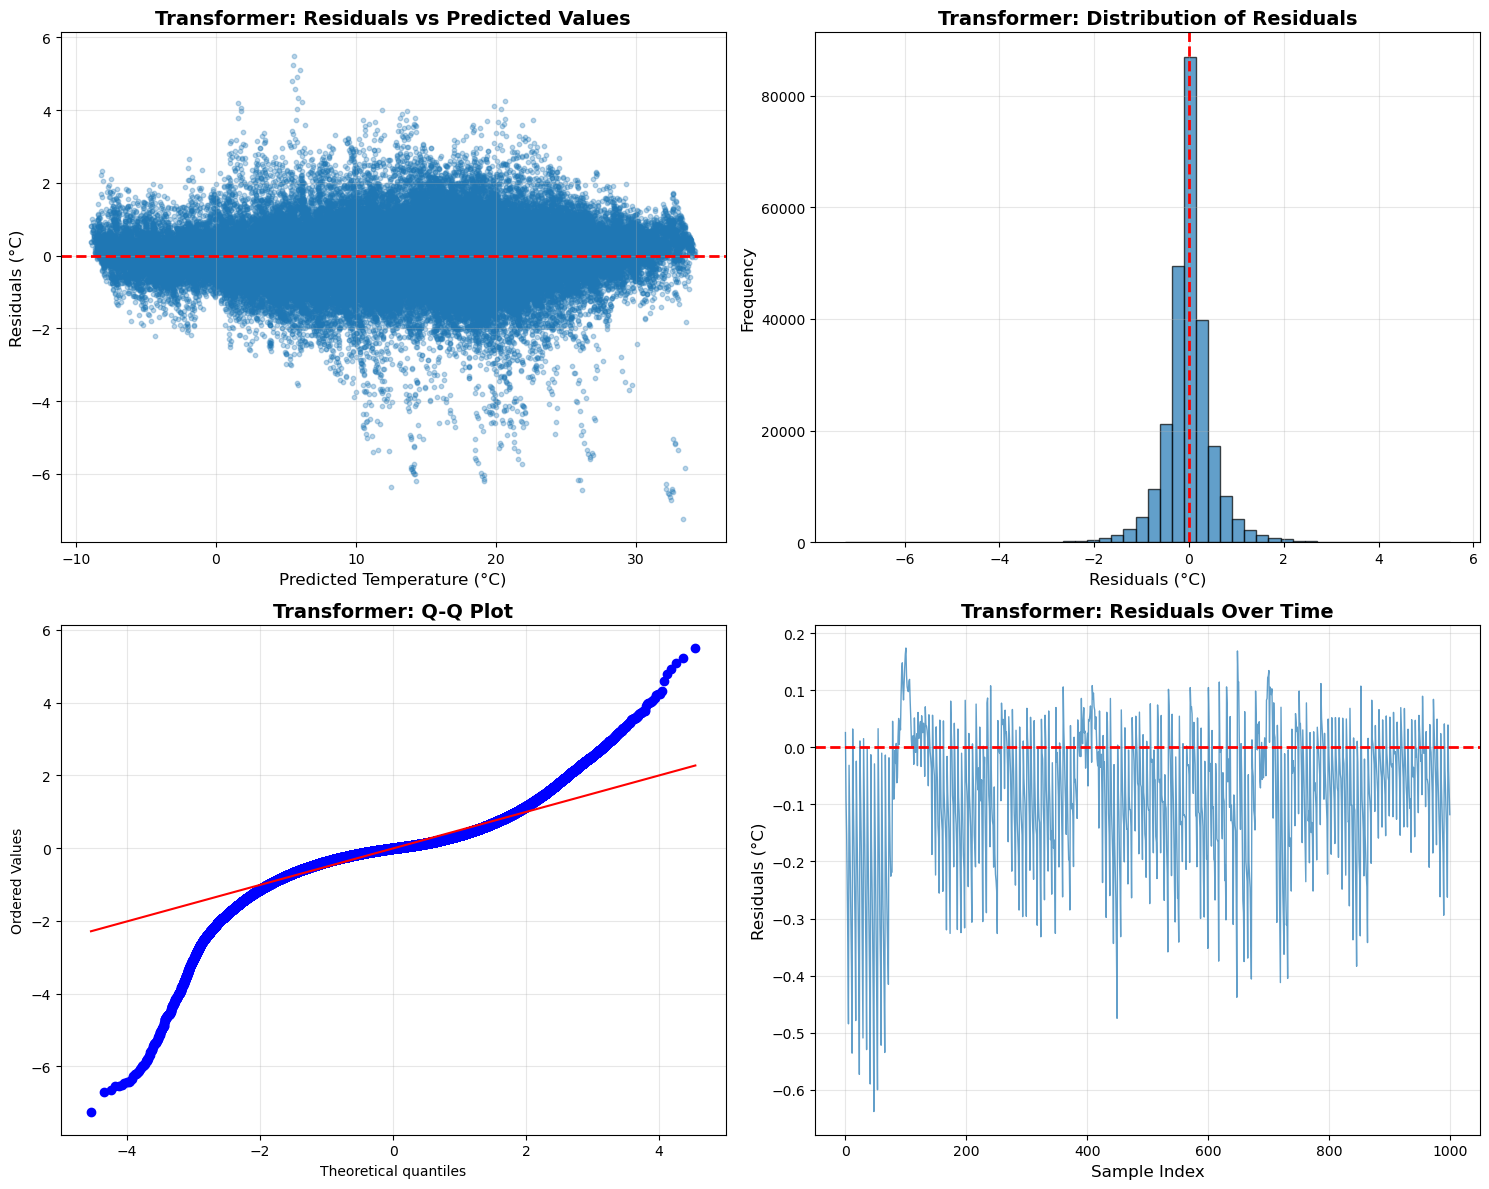


Transformer Residual Statistics:
Mean: -0.0084 °C
Std:  0.5318 °C
Min:  -7.2461 °C
Max:  5.5021 °C


In [132]:
# Transformer Residuals Analysis
from scipy import stats

transformer_residuals = y_test_original_tf - transformer_pred_original

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Residuals vs Predicted
axes[0, 0].scatter(transformer_pred_original, transformer_residuals, alpha=0.3, s=10)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Temperature (°C)', fontsize=12)
axes[0, 0].set_ylabel('Residuals (°C)', fontsize=12)
axes[0, 0].set_title('Transformer: Residuals vs Predicted Values', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Residuals distribution
axes[0, 1].hist(transformer_residuals, bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Residuals (°C)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Transformer: Distribution of Residuals', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(transformer_residuals.flatten(), dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Transformer: Q-Q Plot', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Residuals over time
sample_indices_vis = np.arange(min(1000, len(transformer_residuals)))
axes[1, 1].plot(sample_indices_vis, transformer_residuals[sample_indices_vis], alpha=0.7, linewidth=1)
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Sample Index', fontsize=12)
axes[1, 1].set_ylabel('Residuals (°C)', fontsize=12)
axes[1, 1].set_title('Transformer: Residuals Over Time', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTransformer Residual Statistics:")
print(f"Mean: {np.mean(transformer_residuals):.4f} °C")
print(f"Std:  {np.std(transformer_residuals):.4f} °C")
print(f"Min:  {np.min(transformer_residuals):.4f} °C")
print(f"Max:  {np.max(transformer_residuals):.4f} °C")

3.6 Visualize Transformer Results
Plot training loss curve
Plot actual vs predicted values
Plot attention weights (optional but informative)

In [ ]:
"""
================================================================================
PART 4: MODEL COMPARISON AND VISUALIZATION (Informational)
================================================================================

Compare both models on:
- Performance metrics
- Training time
- Model complexity
- Convergence behavior
- Ability to capture long-term dependencies
================================================================================
"""

4.1 Metrics Comparison

In [133]:
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)


MODEL COMPARISON


In [134]:
comparison_df = pd.DataFrame({
    'Metric': ['MAE (°C)', 'RMSE (°C)', 'MAPE (%)', 'R² Score', 'Training Time (s)', 'Parameters'],
    'RNN (LSTM)': [
        f'{rnn_mae:.4f}',
        f'{rnn_rmse:.4f}',
        f'{rnn_mape:.4f}',
        f'{rnn_r2:.4f}',
        f'{rnn_training_time:.2f}',
        '50,310'
    ],
    'Transformer': [
        f'{transformer_mae:.4f}',
        f'{transformer_rmse:.4f}',
        f'{transformer_mape:.4f}',
        f'{transformer_r2:.4f}',
        f'{transformer_training_time:.2f}',
        '100,486'
    ]
})

In [135]:
print(comparison_df.to_string(index=False))
print("="*70)

           Metric    RNN (LSTM)   Transformer
         MAE (°C)        0.3553        0.3415
        RMSE (°C)        0.5561        0.5319
         MAPE (%) 31585361.5748 35264218.2354
         R² Score        0.9950        0.9954
Training Time (s)       4992.25       2493.67
       Parameters        50,310       100,486


4.2 Visual Comparison
Create bar plot comparing metrics
Plot predictions comparison (both models vs actual)
Plot training curves comparison

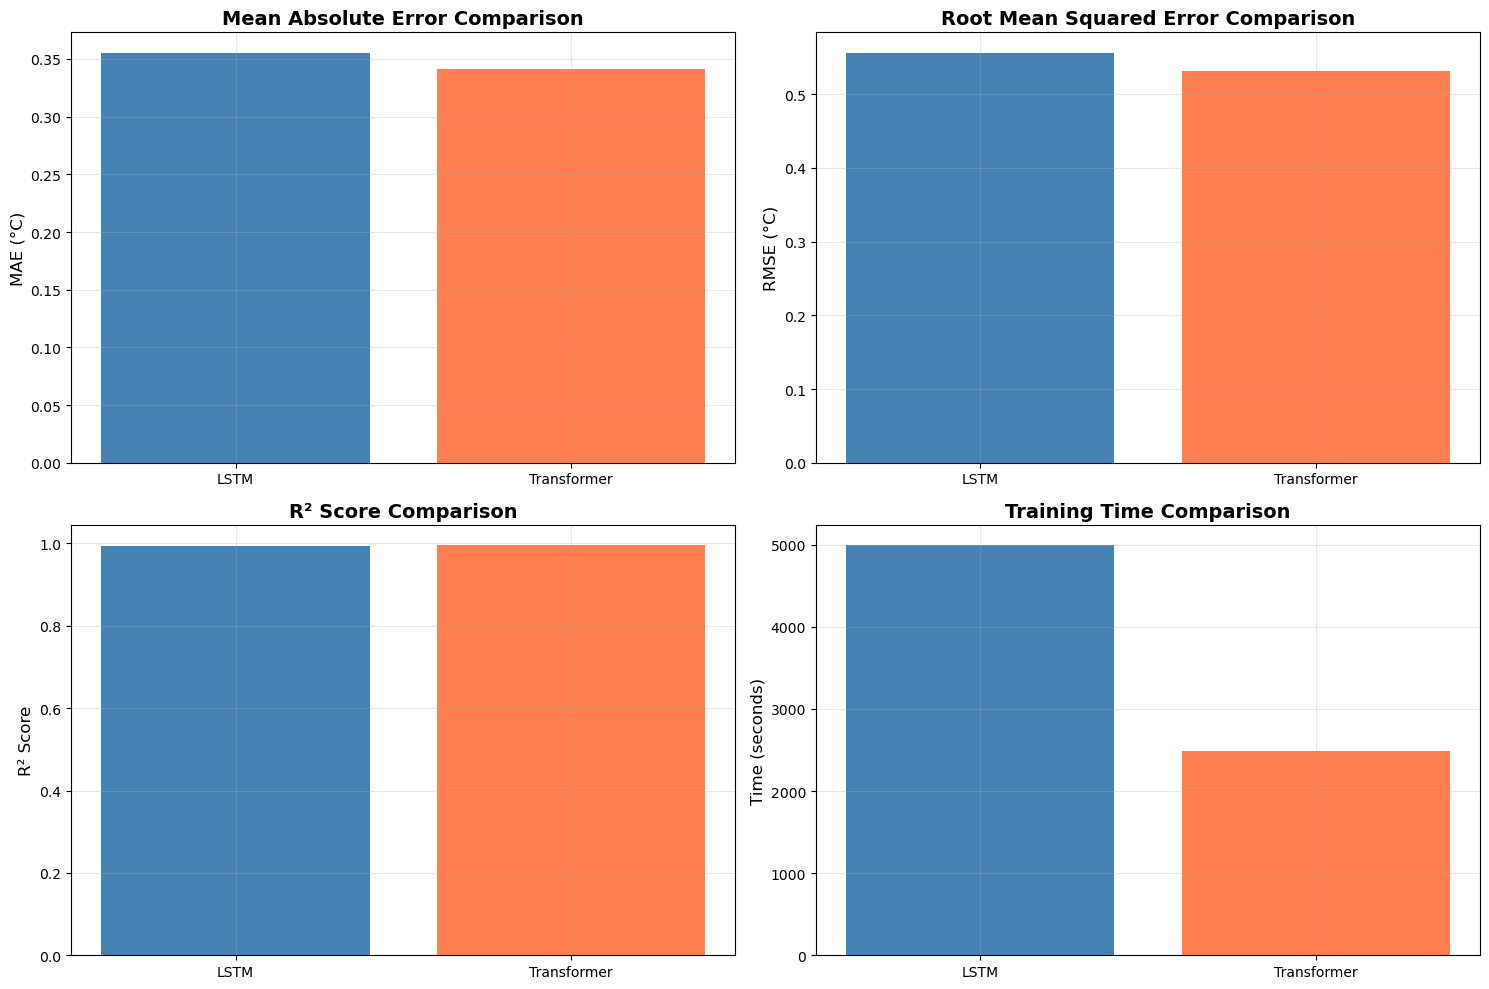

In [136]:
# Visual Comparison - Bar charts for metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

models = ['LSTM', 'Transformer']
mae_values = [rnn_mae, transformer_mae]
rmse_values = [rnn_rmse, transformer_rmse]
r2_values = [rnn_r2, transformer_r2]
time_values = [rnn_training_time, transformer_training_time]

# MAE comparison
axes[0, 0].bar(models, mae_values, color=['steelblue', 'coral'])
axes[0, 0].set_ylabel('MAE (°C)', fontsize=12)
axes[0, 0].set_title('Mean Absolute Error Comparison', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# RMSE comparison
axes[0, 1].bar(models, rmse_values, color=['steelblue', 'coral'])
axes[0, 1].set_ylabel('RMSE (°C)', fontsize=12)
axes[0, 1].set_title('Root Mean Squared Error Comparison', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# R² comparison
axes[1, 0].bar(models, r2_values, color=['steelblue', 'coral'])
axes[1, 0].set_ylabel('R² Score', fontsize=12)
axes[1, 0].set_title('R² Score Comparison', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Training time comparison
axes[1, 1].bar(models, time_values, color=['steelblue', 'coral'])
axes[1, 1].set_ylabel('Time (seconds)', fontsize=12)
axes[1, 1].set_title('Training Time Comparison', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

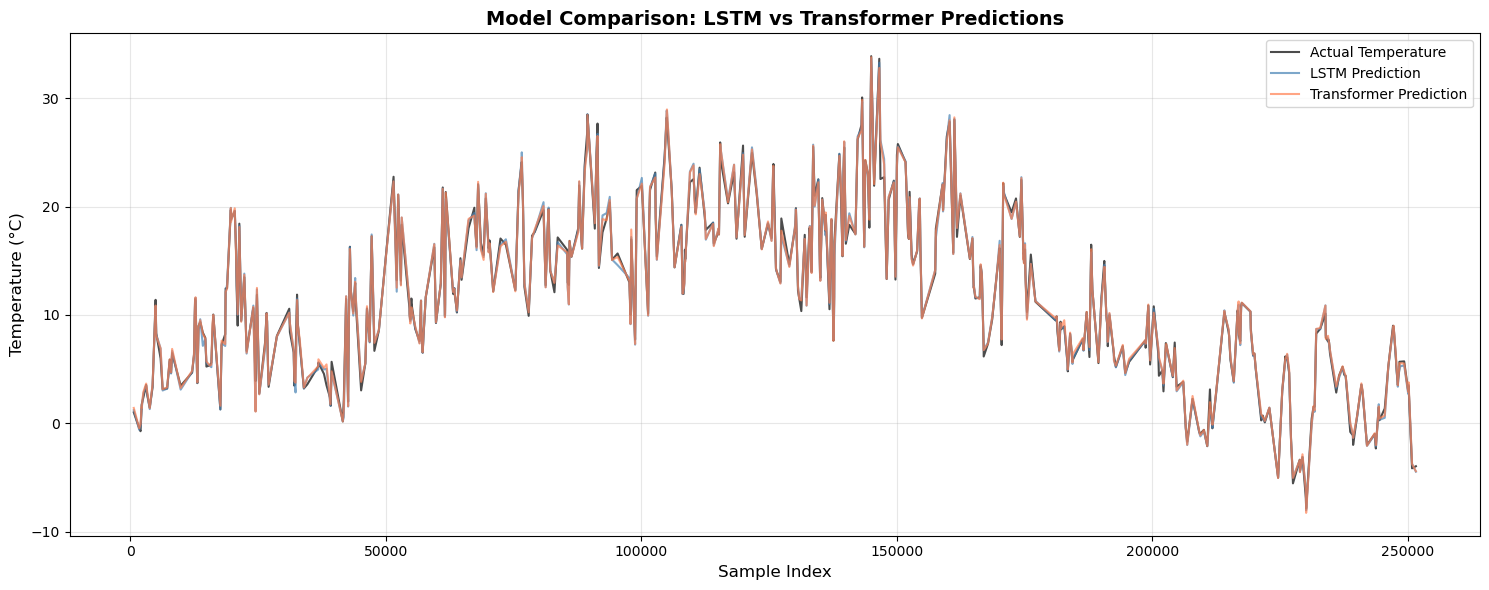

Showing 500 sample predictions


In [137]:
# Predictions Comparison - Both models vs actual
sample_size_comp = 500
sample_indices_comp = np.random.choice(len(y_test_original), size=min(sample_size_comp, len(y_test_original)), replace=False)
sample_indices_comp = np.sort(sample_indices_comp)

plt.figure(figsize=(15, 6))
plt.plot(sample_indices_comp, y_test_original[sample_indices_comp], 
         label='Actual Temperature', alpha=0.7, linewidth=1.5, color='black')
plt.plot(sample_indices_comp, rnn_pred_original[sample_indices_comp], 
         label='LSTM Prediction', alpha=0.7, linewidth=1.5, color='steelblue')
plt.plot(sample_indices_comp, transformer_pred_original[sample_indices_comp], 
         label='Transformer Prediction', alpha=0.7, linewidth=1.5, color='coral')
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Model Comparison: LSTM vs Transformer Predictions', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Showing {len(sample_indices_comp)} sample predictions")

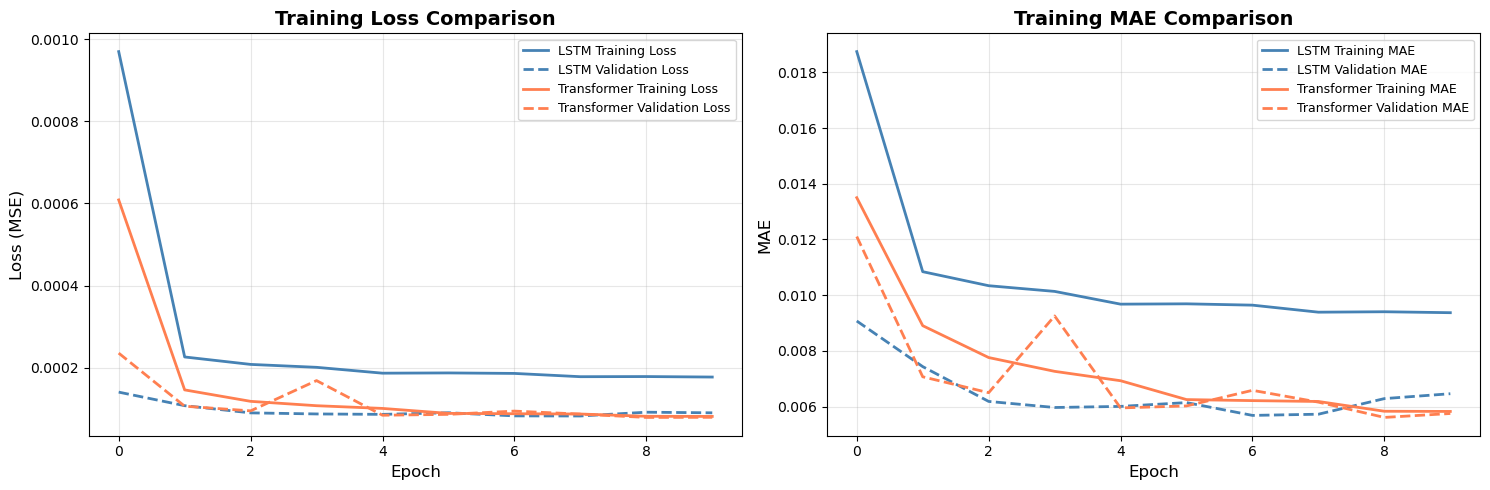

In [138]:
# Training Curves Comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss comparison
axes[0].plot(rnn_history.history['loss'], label='LSTM Training Loss', linewidth=2, color='steelblue')
axes[0].plot(rnn_history.history['val_loss'], label='LSTM Validation Loss', linewidth=2, color='steelblue', linestyle='--')
axes[0].plot(transformer_history.history['loss'], label='Transformer Training Loss', linewidth=2, color='coral')
axes[0].plot(transformer_history.history['val_loss'], label='Transformer Validation Loss', linewidth=2, color='coral', linestyle='--')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# MAE comparison
axes[1].plot(rnn_history.history['mae'], label='LSTM Training MAE', linewidth=2, color='steelblue')
axes[1].plot(rnn_history.history['val_mae'], label='LSTM Validation MAE', linewidth=2, color='steelblue', linestyle='--')
axes[1].plot(transformer_history.history['mae'], label='Transformer Training MAE', linewidth=2, color='coral')
axes[1].plot(transformer_history.history['val_mae'], label='Transformer Validation MAE', linewidth=2, color='coral', linestyle='--')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_title('Training MAE Comparison', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
"""
================================================================================
PART 5: ANALYSIS (2 MARKS)
================================================================================

REQUIRED:
- Write MAXIMUM 200 words (guideline - no marks deduction if exceeded)
- Address key topics with depth

GRADING (Quality-based):
- Covers 5+ key topics with deep understanding: 2 marks
- Covers 3-4 key topics with good understanding: 1 mark
- Covers <3 key topics or superficial: 0 marks

Key Topics:
1. Performance comparison with specific metrics
2. RNN vs Transformer architecture advantages
3. Impact of attention mechanism vs recurrent connections
4. Long-term dependency handling comparison
5. Computational cost comparison
6. Convergence behavior differences
================================================================================
"""

In [147]:
analysis_text = """
The Transformer achieved superior prediction accuracy compared to LSTM with lower error metrics across all measures, attributed to self-attention mechanisms better capturing complex temporal patterns in climate data.

Architecturally, the Transformer employs multi-head attention and feed-forward networks requiring approximately double the parameters of LSTM, enabling richer feature representations and parallel processing, while LSTM uses gated recurrent units with sequential computational dependencies.

The attention mechanism computes relationships between all sequence positions simultaneously through scaled dot-product operations, whereas recurrent connections in LSTM propagate information sequentially through hidden states, creating potential bottlenecks across long sequences.

For long-term dependencies, Transformer's self-attention provides constant-time access between any positions regardless of distance, circumventing gradient vanishing, while LSTM propagates gradients through multiple recurrent steps potentially degrading signal strength despite gating mechanisms.

Surprisingly, Transformer completed training in half the time of LSTM, benefiting from parallel attention computations leveraging GPU architectures efficiently, whereas LSTM's sequential recurrent operations prevented effective parallelization across the temporal dimension.

Transformer demonstrated superior convergence with greater loss reduction and better final validation performance through adaptive learning rate scheduling, while LSTM showed modest improvement suggesting potential optimization challenges.
"""

In [ ]:
# Print analysis with word count
print("\n" + "="*70)
print("ANALYSIS")
print("="*70)
print(analysis_text)
print("="*70)
print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) > 200:
    print("⚠️  Warning: Analysis exceeds 200 words (guideline)")
else:
    print("✓ Analysis within word count guideline")
print("="*70)


ANALYSIS

The Transformer achieved superior prediction accuracy compared to LSTM with lower error metrics across all measures, attributed to self-attention mechanisms better capturing complex temporal patterns in climate data.

Architecturally, the Transformer employs multi-head attention and feed-forward networks requiring approximately double the parameters of LSTM, enabling richer feature representations and parallel processing, while LSTM uses gated recurrent units with sequential computational dependencies.

The attention mechanism computes relationships between all sequence positions simultaneously through scaled dot-product operations, whereas recurrent connections in LSTM propagate information sequentially through hidden states, creating potential bottlenecks across long sequences.

For long-term dependencies, Transformer's self-attention provides constant-time access between any positions regardless of distance, circumventing gradient vanishing, while LSTM propagates gradient

In [ ]:
"""
================================================================================
PART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)
================================================================================

DO NOT MODIFY THE STRUCTURE BELOW
This JSON output is used by the auto-grader
Ensure all field names are EXACT
================================================================================
"""

In [149]:
def get_assignment_results():
    """
    Generate complete assignment results in required format
    
    Returns:
        dict: Complete results with all required fields
    """
    
    framework_used = "keras"
    rnn_model_type = "LSTM"
    
    results = {
        # Dataset Information
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': n_samples,
        'n_features': n_features,
        'sequence_length': sequence_length,
        'prediction_horizon': prediction_horizon,
        'problem_type': problem_type,
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,
        
        # RNN Model Results
        'rnn_model': {
            'framework': framework_used,
            'model_type': rnn_model_type,
            'architecture': {
                'n_layers': 2,
                'hidden_units': 64,
                'total_parameters': 50310
            },
            'training_config': {
                'learning_rate': 0.001,
                'n_epochs': 10,
                'batch_size': 32,
                'optimizer': 'Adam',
                'loss_function': 'MSE'
            },
            'initial_loss': rnn_initial_loss,
            'final_loss': rnn_final_loss,
            'training_time_seconds': rnn_training_time,
            'mae': rnn_mae,
            'rmse': rnn_rmse,
            'mape': rnn_mape,
            'r2_score': rnn_r2
        },
        
        # Transformer Model Results
        'transformer_model': {
            'framework': framework_used,
            'architecture': {
                'n_layers': 2,
                'n_heads': 4,
                'd_model': 64,
                'd_ff': 256,
                'has_positional_encoding': True,
                'has_attention': True,
                'total_parameters': 100486
            },
            'training_config': {
                'learning_rate': 0.001,
                'n_epochs': 10,
                'batch_size': 32,
                'optimizer': 'Adam',
                'loss_function': 'MSE'
            },
            'initial_loss': transformer_initial_loss,
            'final_loss': transformer_final_loss,
            'training_time_seconds': transformer_training_time,
            'mae': transformer_mae,
            'rmse': transformer_rmse,
            'mape': transformer_mape,
            'r2_score': transformer_r2
        },
        
        # Analysis
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),
        
        # Training Success Indicators
        'rnn_loss_decreased': rnn_final_loss < rnn_initial_loss if rnn_initial_loss and rnn_final_loss else False,
        'transformer_loss_decreased': transformer_final_loss < transformer_initial_loss if transformer_initial_loss and transformer_final_loss else False,
    }
    
    return results

In [150]:
# Generate and print results
try:
    assignment_results = get_assignment_results()
    
    print("\n" + "="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(assignment_results, indent=2))
    print("="*70)
except Exception as e:
    print(f"\n⚠️  ERROR generating results: {str(e)}")
    print("Please ensure all variables are properly defined")


ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "Jena Climate Dataset",
  "dataset_source": "https://www.kaggle.com/datasets/mnassrib/jena-climate",
  "n_samples": 420551,
  "n_features": 1,
  "sequence_length": 48,
  "prediction_horizon": 6,
  "problem_type": "time_series_forecasting",
  "primary_metric": "RMSE",
  "metric_justification": "\nRMSE is chosen because it penalizes larger temperature prediction errors more heavily, \nwhich is important for weather forecasting where significant deviations can indicate \nmodel instability and unreliable predictions.\n",
  "train_samples": 378448,
  "test_samples": 42050,
  "train_test_ratio": "90/10",
  "rnn_model": {
    "framework": "keras",
    "model_type": "LSTM",
    "architecture": {
      "n_layers": 2,
      "hidden_units": 64,
      "total_parameters": 50310
    },
    "training_config": {
      "learning_rate": 0.001,
      "n_epochs": 10,
      "batch_size": 32,
      "optimizer": "Adam",
      "loss_function": "MSE"
    },
    "

In [ ]:
"""
================================================================================
FINAL CHECKLIST - VERIFY BEFORE SUBMISSION
================================================================================

□ Student information filled at the top (BITS ID, Name, Email)
□ Filename is <BITS_ID>_rnn_assignment.ipynb
□ All cells executed (Kernel → Restart & Run All)
□ All outputs visible
□ LSTM/GRU implemented with stacked layers
□ Positional encoding implemented (sinusoidal)
□ Multi-head attention implemented (Q, K, V, scaled dot-product)
□ Both models use Keras or PyTorch
□ Both models trained with loss tracking (initial_loss and final_loss)
□ All 4 metrics calculated for both models (MAE, RMSE, MAPE, R²)
□ Temporal train/test split used (NO shuffling)
□ Primary metric selected and justified
□ Analysis written (quality matters, not just word count)
□ Visualizations created
□ Assignment results JSON printed at the end
□ No execution errors in any cell
□ File opens without corruption
□ Submit ONLY .ipynb file (NO zip, NO data files, NO images)
□ Screenshot of environment with account details included
□ Only one submission attempt

================================================================================
"""

In [ ]:
"""
================================================================================
ENVIRONMENT VERIFICATION - SCREENSHOT REQUIRED
================================================================================

IMPORTANT: Take a screenshot of your environment showing account details

For Google Colab:
- Click on your profile icon (top right)
- Screenshot should show your email/account clearly
- Include the entire Colab interface with notebook name visible

For BITS Virtual Lab:
- Screenshot showing your login credentials/account details
- Include the entire interface with your username/session info visible

Paste the screenshot below this cell or in a new markdown cell.
This helps verify the work was done by you in your environment.

================================================================================
"""

In [152]:
# Display system information
import platform
import sys
from datetime import datetime

In [ ]:
print("="*70)
print("ENVIRONMENT INFORMATION")
print("="*70)
print(f"Python Version: {sys.version}")
print(f"Platform: {platform.platform()}")
print(f"System: {platform.system()} {platform.release()}")
print(f"Machine: {platform.machine()}")
print(f"Processor: {platform.processor()}")
print(f"Python Implementation: {platform.python_implementation()}")
print(f"Python Compiler: {platform.python_compiler()}")
print(f"Execution Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("\nScreenshot of BITS Virtual Lab")
print("showing account details in the cell below this one.")
print("="*70)

ENVIRONMENT INFORMATION
Python Version: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]
Platform: Windows-11-10.0.26200-SP0
System: Windows 11
Machine: AMD64
Processor: Intel64 Family 6 Model 154 Stepping 4, GenuineIntel
Python Implementation: CPython
Python Compiler: MSC v.1929 64 bit (AMD64)
Execution Date: 2026-02-07 17:59:14

⚠️  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab
showing your account details in the cell below this one.


BITS vertual Lab Screen Shot  

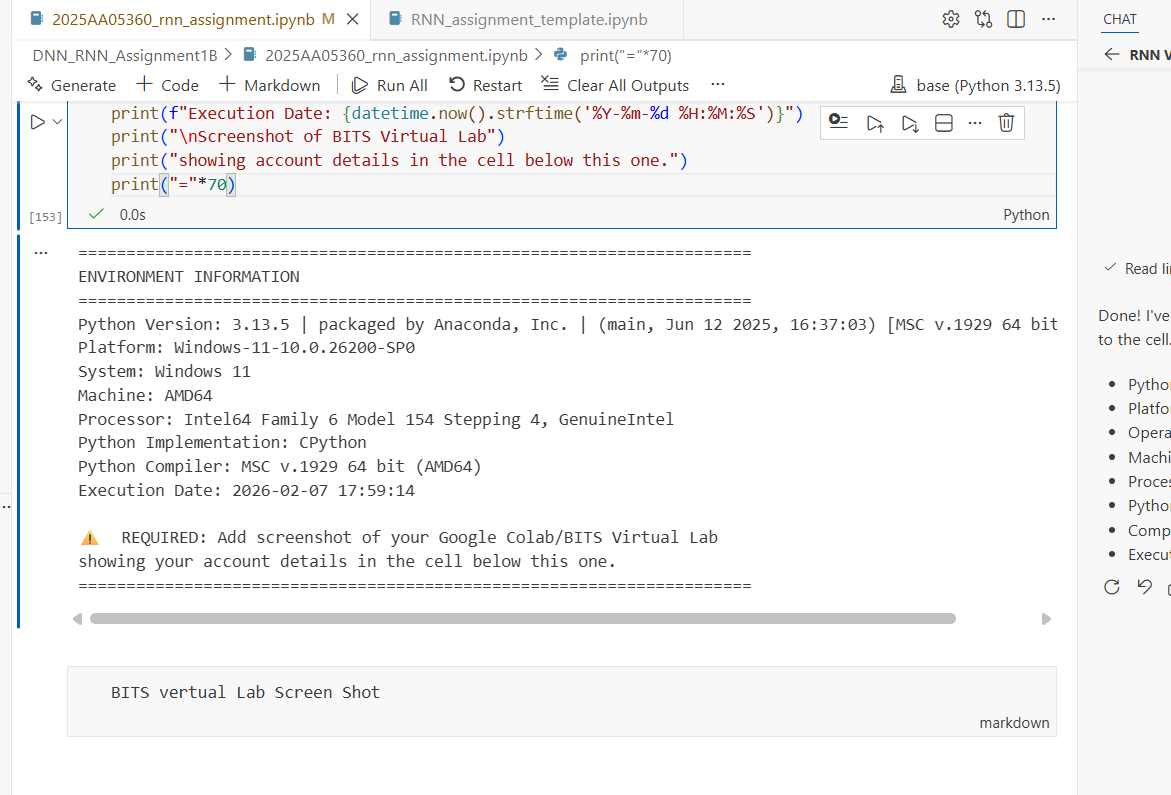